# Potential maintenance opportunity of Machines

# import libraries

In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns

# Reading in  the data files

# Import train data

In [341]:
train = pd.read_csv('Train.csv')

In [342]:
train.head(5)

MachineID      ActionPoint
0  MID11001  ComponentRepair
1  MID11002  ComponentRepair
2  MID11003          NoIssue
3  MID11004          NoIssue
4  MID11005  ComponentRepair

In [343]:
train.tail(5)

MachineID           ActionPoint
669  MID11845               NoIssue
670  MID11846       ComponentRepair
671  MID11847  ComponentReplacement
672  MID11848       ComponentRepair
673  MID11850       ComponentRepair

In [137]:
list(train['ActionPoint'].unique())

['ComponentRepair', 'NoIssue', 'ComponentReplacement']

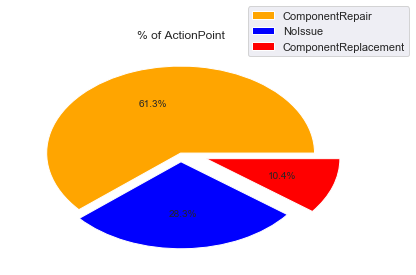

In [138]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.pie(train["ActionPoint"].value_counts(), autopct='%1.1f%%', explode = (0, 0.1, 0.2),
       colors = ["Orange", "Blue", "Red"])

plt.title("% of ActionPoint", )

plt.legend(['ComponentRepair', 'NoIssue', 'ComponentReplacement'], bbox_to_anchor=(1.2,1.2))

plt.show()

In [344]:
train.shape

(674, 2)

# Import test data

In [345]:
test = pd.read_csv('Test.csv')

In [346]:
test.shape

(326, 1)

In [347]:
test['ActionPoint'] = 'test_data'

# Combine train & test data

In [348]:
data = pd.concat([train,test])

In [349]:
data.shape

(1000, 2)

In [331]:
data.head(5)

MachineID      ActionPoint
0  MID11001  ComponentRepair
1  MID11002  ComponentRepair
2  MID11003          NoIssue
3  MID11004          NoIssue
4  MID11005  ComponentRepair

In [332]:
data.tail(5)

MachineID ActionPoint
321  MID11996   test_data
322  MID11997   test_data
323  MID11998   test_data
324  MID11999   test_data
325  MID12000   test_data

# Import Machine details file

In [291]:
machine_details = pd.read_csv("MachinesDetails.csv")

In [292]:
# del machine_details_train
machine_details_train = pd.merge(machine_details, train, how='inner', on= ['MachineID'])

In [148]:
machine_details.head(5)

MachineID MachineModel  ServicePeriod
0  MID10801       model4             21
1  MID10802       model4             21
2  MID10803       model1             20
3  MID10804       model2             20
4  MID10805       model2             20

In [14]:
machine_details.tail(5)

MachineID MachineModel  ServicePeriod
1145  MID11996       model4              1
1146  MID11997       model1              1
1147  MID11998       model4              1
1148  MID11999       model2              1
1149  MID12000       model3              1

In [57]:
machine_details.describe()

ServicePeriod
count    1150.000000
mean       11.193913
std         6.103100
min         0.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        22.000000

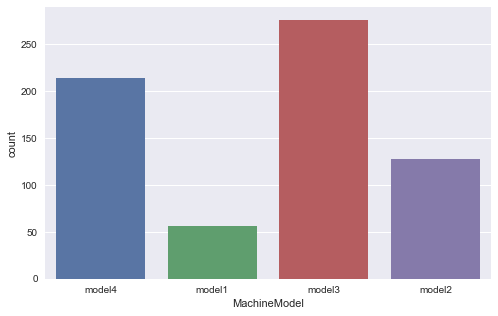

In [49]:
import seaborn as sns
sns.set(style="darkgrid")
# machine = sns.load_dataset("MachinesDetails.csv")
plt.rcParams['figure.figsize']=8,5
ax = sns.countplot(x="MachineModel", data=machine_details_train)
plt.savefig('attribute_histogram_plots')


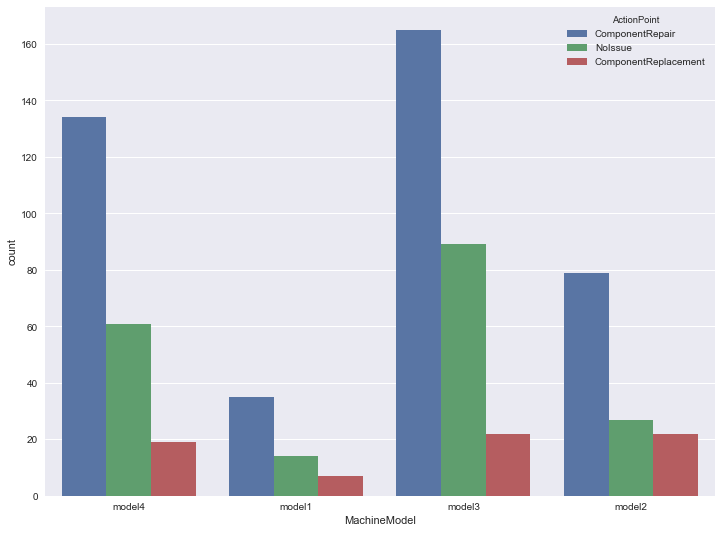

In [41]:
import seaborn as sns
sns.set(style="darkgrid")
# machine = sns.load_dataset("MachinesDetails.csv")
plt.rcParams['figure.figsize']=12,9
ax = sns.countplot(x="MachineModel", hue = "ActionPoint", data=machine_details_train)


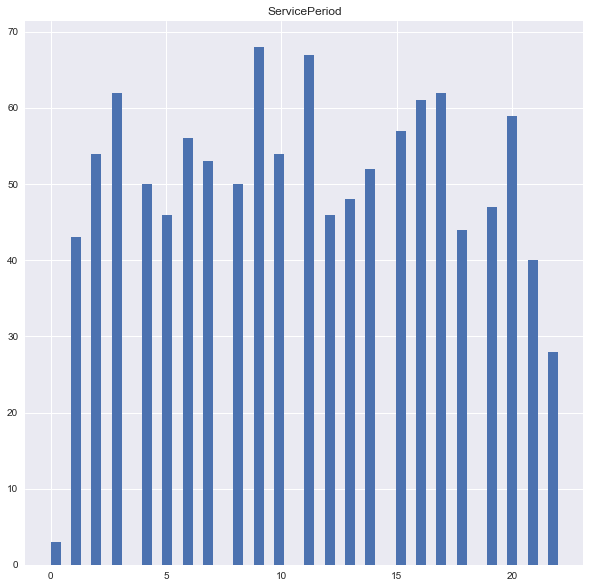

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

machine_details.hist(bins=50, figsize=(10,10))
plt.savefig('attribute_histogram_plots')
plt.show()

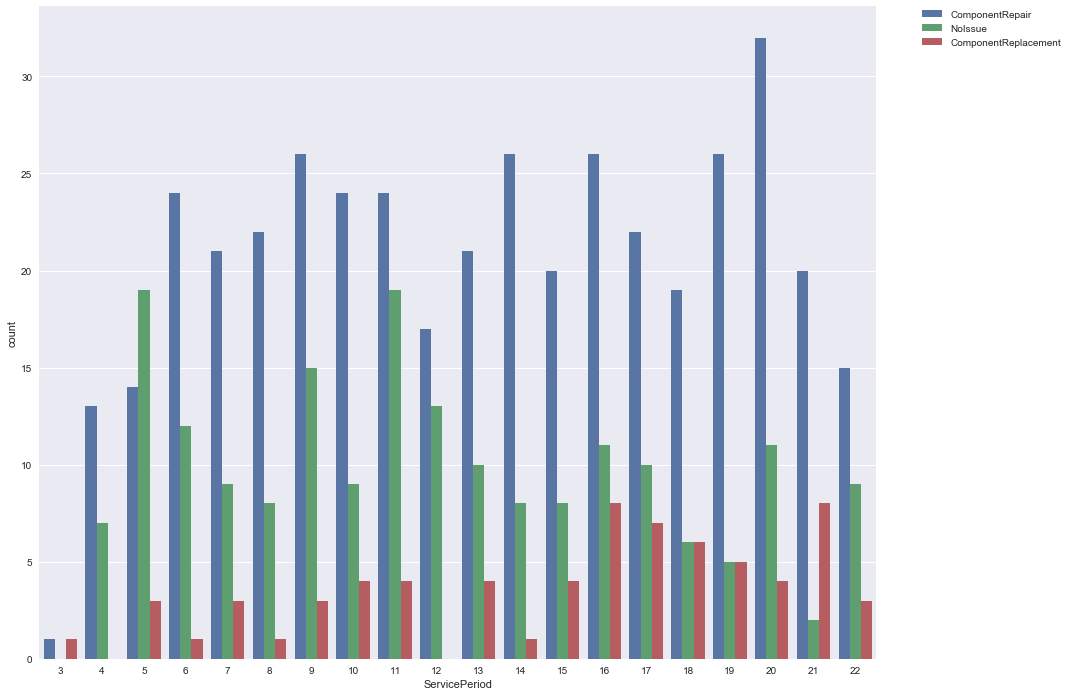

In [60]:
import seaborn as sns
sns.set(style="darkgrid")
# machine = sns.load_dataset("MachinesDetails.csv")
plt.rcParams['figure.figsize']=15,12
ax = sns.countplot(x="ServicePeriod", hue = "ActionPoint", data=machine_details_train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Obtain the details of machines into the data set

In [350]:
data = pd.merge(data, machine_details,  how='left', on= ['MachineID'])

In [351]:
data.shape

(1000, 4)

In [238]:
data.head(5)

MachineID      ActionPoint MachineModel  ServicePeriod
0  MID11001  ComponentRepair       model4             21
1  MID11002  ComponentRepair       model1             21
2  MID11003          NoIssue       model3             22
3  MID11004          NoIssue       model4             22
4  MID11005  ComponentRepair       model3             22

# Check if we have any column wise null values after the left inner join

In [271]:
data.isnull().sum()

MachineID        0
ActionPoint      0
MachineModel     0
ServicePeriod    0
dtype: int64

# Import the complaints log data

In [10]:
complaints = pd.read_csv('ComplaintsLog.csv')

In [11]:
complaints.head(5)

Year  Month  Day      Time MachineID ErrorID
0  2017      1    6  06:00:00  MID10889  error1
1  2017      2   20  06:00:00  MID10889  error2
2  2017      2   20  06:00:00  MID10889  error3
3  2017      2   22  04:00:00  MID10889  error4
4  2017      3   22  06:00:00  MID10889  error1

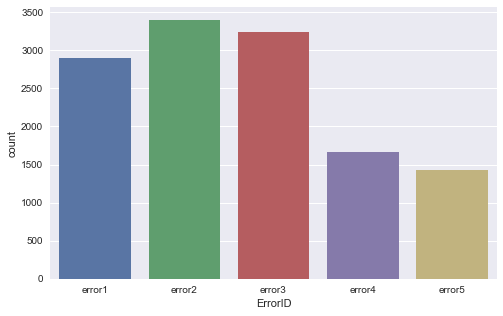

In [75]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=8,5
ax = sns.countplot(x="ErrorID", data=complaints)

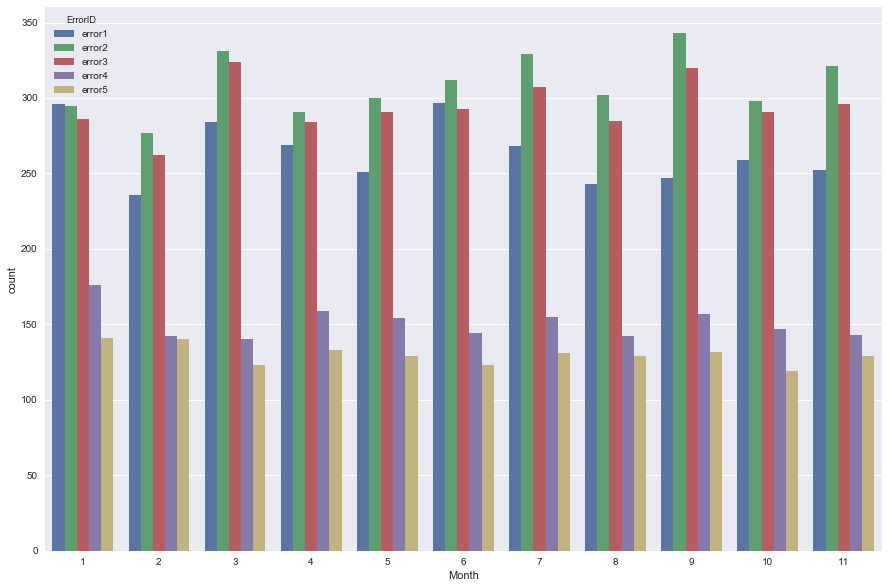

In [80]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
ax = sns.countplot(x="Month", hue = 'ErrorID', data=complaints)

In [123]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 6 columns):
Year         12628 non-null int64
Month        12628 non-null int64
Day          12628 non-null int64
Time         12628 non-null object
MachineID    12628 non-null object
ErrorID      12628 non-null object
dtypes: int64(3), object(3)
memory usage: 592.0+ KB


In [63]:
complaints.shape

(12628, 6)

In [12]:
from datetime import datetime

In [13]:
# converting the year month date and time into date time format

complaints['YearMonthDay'] = pd.to_datetime(complaints[['Year', 'Month', 'Day']])
complaints['complaint_time']= pd.to_datetime(complaints['YearMonthDay'].astype(str) + ' ' + complaints['Time'].astype(str))

In [14]:
complaints['Final_date']= datetime.strptime(str(20171231), '%Y%m%d').strftime('%Y-%m-%d')
complaints['Final_date'] = pd.to_datetime(complaints['Final_date'])

In [15]:
# obtain the recency of the complaint using a cut off date.
complaints['recency']= (complaints['Final_date'] - complaints['YearMonthDay']).dt.total_seconds()/86400

In [16]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 10 columns):
Year              12628 non-null int64
Month             12628 non-null int64
Day               12628 non-null int64
Time              12628 non-null object
MachineID         12628 non-null object
ErrorID           12628 non-null object
YearMonthDay      12628 non-null datetime64[ns]
complaint_time    12628 non-null datetime64[ns]
Final_date        12628 non-null datetime64[ns]
recency           12628 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 986.6+ KB


In [17]:
# obtain the difference in time between each error for a particulary machine.

complaints['all_errors_diff'] = complaints.sort_values(['MachineID','YearMonthDay']).groupby('MachineID')['YearMonthDay'].diff()

In [18]:
# obtain the difference in time between the same type of error for a particulary machine
complaints['error_wise_diff']= complaints.sort_values(['MachineID','ErrorID','YearMonthDay']).groupby(['MachineID','ErrorID'])['YearMonthDay'].diff()

In [19]:
complaints['all_errors_diff']= complaints['all_errors_diff'].dt.total_seconds()/86400
complaints['error_wise_diff']= complaints['error_wise_diff'].dt.total_seconds()/86400

In [20]:
complaints = complaints.fillna(0)
complaints.isnull().sum()

Year               0
Month              0
Day                0
Time               0
MachineID          0
ErrorID            0
YearMonthDay       0
complaint_time     0
Final_date         0
recency            0
all_errors_diff    0
error_wise_diff    0
dtype: int64

In [29]:
complaints.to_csv('text.csv')

In [21]:
# obtain the unique machine id's into a list to iterate over a dictionary
unique_machines = list(complaints['MachineID'].unique())

In [22]:
unique_machines

['MID10889',
 'MID10898',
 'MID10928',
 'MID10847',
 'MID10825',
 'MID10828',
 'MID10826',
 'MID10913',
 'MID10869',
 'MID10827',
 'MID10914',
 'MID10903',
 'MID10841',
 'MID10820',
 'MID10811',
 'MID10806',
 'MID10876',
 'MID10812',
 'MID10842',
 'MID10860',
 'MID10935',
 'MID10837',
 'MID10947',
 'MID10899',
 'MID10882',
 'MID10862',
 'MID10829',
 'MID10941',
 'MID10884',
 'MID10863',
 'MID10890',
 'MID10895',
 'MID10885',
 'MID10851',
 'MID10870',
 'MID10852',
 'MID10877',
 'MID10948',
 'MID10821',
 'MID10866',
 'MID10816',
 'MID10915',
 'MID10855',
 'MID10916',
 'MID10917',
 'MID10920',
 'MID10839',
 'MID10891',
 'MID10853',
 'MID10801',
 'MID10936',
 'MID10864',
 'MID10892',
 'MID10813',
 'MID10896',
 'MID10942',
 'MID10822',
 'MID10830',
 'MID10831',
 'MID10943',
 'MID10802',
 'MID10840',
 'MID10871',
 'MID10912',
 'MID10939',
 'MID10808',
 'MID10918',
 'MID10933',
 'MID10856',
 'MID10814',
 'MID10809',
 'MID10911',
 'MID10929',
 'MID10949',
 'MID10878',
 'MID10904',
 'MID10886',

In [23]:
# Using dictionaries to aggregate over each machine and obtain a dictionary of dictionaries
# Error wise time gap,all errors time gap, recency of errors and frequency of errors are obtained.


complaints_dict = {}

for machine in unique_machines:
    temp_df = complaints.loc[complaints['MachineID'] == machine]
    
    if len(temp_df)>0:
        u_machine_id = machine


# aggregations done by passing as a parameter which is easy to do many aggregations in a single data set
        aggregations = {
            'recency': {
                'last_error_recency' : np.min},
            'error_wise_diff':{
                'error_wise_timegap': np.mean}
        }
        
        machine_error_df = temp_df.groupby(['ErrorID']).agg(aggregations)

# iterating over the index of the data frame and converting the values into features
        machine_error_dict = {} 
        for i in machine_error_df.index:
            machine_error_dict[str(i)+'_last_error_recency'] = machine_error_df.loc[i]['recency']['last_error_recency']
            machine_error_dict[str(i)+'_error_wise_timegap'] = machine_error_df.loc[i]['error_wise_diff']['error_wise_timegap']
            
        error_series = temp_df.groupby('ErrorID').size()
        error_count = {}
        for i in error_series.index:
            error_count[str(i)+'_count'] = error_series[i]
        
        all_errors_gap = temp_df['all_errors_diff'].mean()
        
        all_errors_time_dict = {}
           
        all_errors_time_dict['all_errors_diff'] = all_errors_gap
        
        
# combining all the dictionaries together into a giant dictionary with all the keys as machine ID's       
        
        complaints_dict[u_machine_id] = [machine_error_dict, error_count, all_errors_time_dict]
        
        del temp_df
    else:
        pass
        

C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [24]:
complaints_dict

{'MID10889': [{'error1_error_wise_timegap': 39.75,
   'error1_last_error_recency': 200.0,
   'error2_error_wise_timegap': 60.0,
   'error2_last_error_recency': 194.00000000000003,
   'error3_error_wise_timegap': 60.0,
   'error3_last_error_recency': 194.00000000000003,
   'error4_error_wise_timegap': 0.0,
   'error4_last_error_recency': 312.0,
   'error5_error_wise_timegap': 0.0,
   'error5_last_error_recency': 166.0},
  {'error1_count': 4,
   'error2_count': 2,
   'error3_count': 2,
   'error4_count': 1,
   'error5_count': 1},
  {'all_errors_diff': 19.3}],
 'MID10898': [{'error2_error_wise_timegap': 32.5,
   'error2_last_error_recency': 130.0,
   'error3_error_wise_timegap': 39.0,
   'error3_last_error_recency': 130.0,
   'error4_error_wise_timegap': 85.0,
   'error4_last_error_recency': 77.0},
  {'error2_count': 6, 'error3_count': 5, 'error4_count': 2},
  {'all_errors_diff': 19.076923076923077}],
 'MID10928': [{'error1_error_wise_timegap': 60.0,
   'error1_last_error_recency': 160.0,

In [25]:
len(complaints_dict)

1150

In [26]:
# converting dictionary of dictionaries into dictionary with multiple columns

show_complaints_dict = {}

for key, value in complaints_dict.items():
    value_dict = {}
    
    for k, v in value[0].items():
        value_dict[k]= v
    
    for k, v in value[1].items():
        value_dict[k]= v
    
    for k, v in value[2].items():
        value_dict[k]= v

    show_complaints_dict[key]= value_dict

In [27]:
show_complaints_dict

{'MID10889': {'all_errors_diff': 19.3,
  'error1_count': 4,
  'error1_error_wise_timegap': 39.75,
  'error1_last_error_recency': 200.0,
  'error2_count': 2,
  'error2_error_wise_timegap': 60.0,
  'error2_last_error_recency': 194.00000000000003,
  'error3_count': 2,
  'error3_error_wise_timegap': 60.0,
  'error3_last_error_recency': 194.00000000000003,
  'error4_count': 1,
  'error4_error_wise_timegap': 0.0,
  'error4_last_error_recency': 312.0,
  'error5_count': 1,
  'error5_error_wise_timegap': 0.0,
  'error5_last_error_recency': 166.0},
 'MID10898': {'all_errors_diff': 19.076923076923077,
  'error2_count': 6,
  'error2_error_wise_timegap': 32.5,
  'error2_last_error_recency': 130.0,
  'error3_count': 5,
  'error3_error_wise_timegap': 39.0,
  'error3_last_error_recency': 130.0,
  'error4_count': 2,
  'error4_error_wise_timegap': 85.0,
  'error4_last_error_recency': 77.0},
 'MID10928': {'all_errors_diff': 25.2,
  'error1_count': 3,
  'error1_error_wise_timegap': 60.0,
  'error1_last_er

In [46]:
# Converting the dictionary into data frame and fill the na's with zero

complaints_df = pd.DataFrame.from_dict(show_complaints_dict,orient='index').fillna(0)

In [47]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, MID10801 to MID12000
Data columns (total 16 columns):
error1_last_error_recency    1150 non-null float64
error1_error_wise_timegap    1150 non-null float64
error2_last_error_recency    1150 non-null float64
error2_error_wise_timegap    1150 non-null float64
error3_last_error_recency    1150 non-null float64
error3_error_wise_timegap    1150 non-null float64
error4_last_error_recency    1150 non-null float64
error4_error_wise_timegap    1150 non-null float64
error5_last_error_recency    1150 non-null float64
error5_error_wise_timegap    1150 non-null float64
error1_count                 1150 non-null float64
error2_count                 1150 non-null float64
error3_count                 1150 non-null float64
error4_count                 1150 non-null float64
error5_count                 1150 non-null float64
all_errors_diff              1150 non-null float64
dtypes: float64(16)
memory usage: 152.7+ KB


In [48]:
complaints_df.head(5)

error1_last_error_recency  error1_error_wise_timegap  \
MID10801                       46.0                  78.333333   
MID10802                      220.0                  21.000000   
MID10803                      121.0                  33.833333   
MID10804                      116.0                  35.000000   
MID10805                       31.0                  93.666667   

          error2_last_error_recency  error2_error_wise_timegap  \
MID10801                       31.0                      67.50   
MID10802                       82.0                      85.00   
MID10803                       54.0                      41.25   
MID10804                      101.0                      56.25   
MID10805                      106.0                      74.50   

          error3_last_error_recency  error3_error_wise_timegap  \
MID10801                       31.0                      54.00   
MID10802                       82.0                      85.00   
MID10803                       54.0                      41.25   
MID10804                      161.0                      41.25   
MID10805                      106.0                      87.00   

          error4_last_error_recency  error4_error_wise_timegap  \
MID10801                      205.0                       2.00   
MID10802                      231.0                       0.00   
MID10803                       36.0                      50.50   
MID10804                       41.0                      50.00   
MID10805                       61.0                      63.75   

          error5_last_error_recency  error5_error_wise_timegap  error1_count  \
MID10801                       76.0                       60.0           3.0   
MID10802                      127.0                       67.5           2.0   
MID10803                       99.0                       75.0           6.0   
MID10804                       71.0                       60.0           3.0   
MID10805                       46.0                       63.0           3.0   

          error2_count  error3_count  error4_count  error5_count  \
MID10801           4.0           5.0           2.0           4.0   
MID10802           3.0           3.0           1.0           2.0   
MID10803           4.0           4.0           6.0           3.0   
MID10804           4.0           4.0           6.0           4.0   
MID10805           2.0           2.0           4.0           5.0   

          all_errors_diff  
MID10801        15.833333  
MID10802        23.181818  
MID10803        13.173913  
MID10804        14.285714  
MID10805        20.625000

In [49]:
complaints_df = complaints_df.reset_index()
complaints_df.rename(columns={'index':'MachineID'}, inplace=True)

In [50]:
complaints_df_train = pd.merge(complaints_df, train, how='inner', on = ['MachineID'])

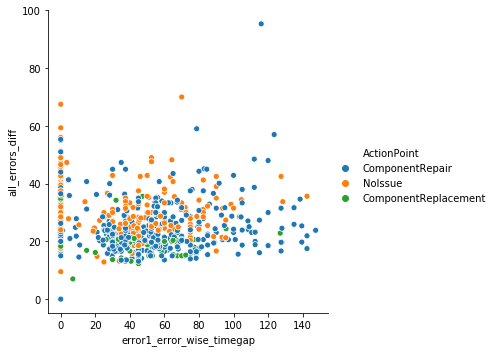

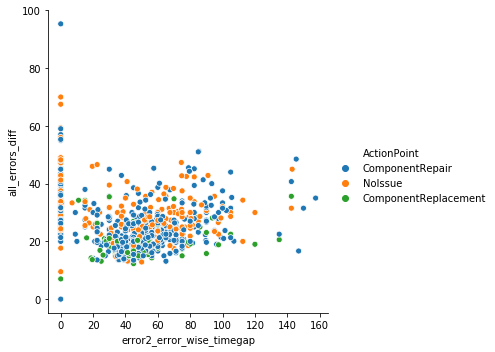

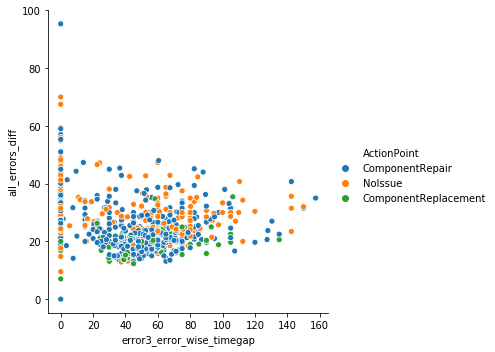

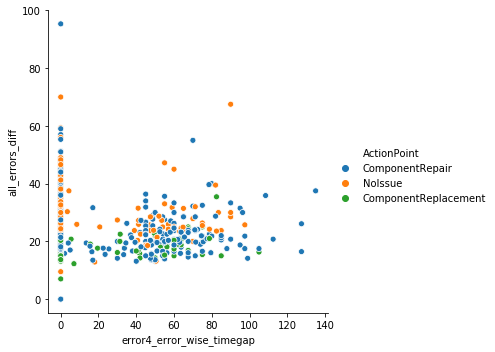

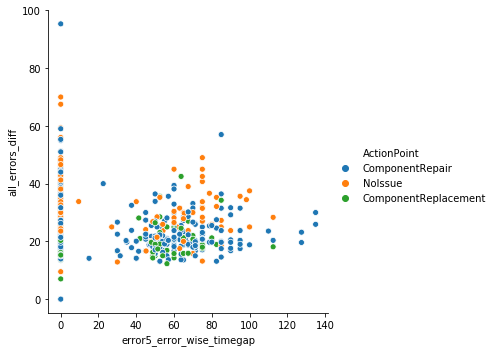

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
# machine = sns.load_dataset("MachinesDetails.csv")
#plt.rcParams['figure.figsize']=12,9
sns.relplot(x="error1_error_wise_timegap",y= "all_errors_diff",hue = "ActionPoint", data=complaints_df_train)
sns.relplot(x="error2_error_wise_timegap",y= "all_errors_diff",hue = "ActionPoint", data=complaints_df_train)
sns.relplot(x="error3_error_wise_timegap",y= "all_errors_diff",hue = "ActionPoint", data=complaints_df_train)
sns.relplot(x="error4_error_wise_timegap",y= "all_errors_diff",hue = "ActionPoint", data=complaints_df_train)
sns.relplot(x="error5_error_wise_timegap",y= "all_errors_diff",hue = "ActionPoint", data=complaints_df_train)

# Import component replacement log

In [61]:
replacement = pd.read_csv('ComponentReplacementLog.csv')


In [160]:
replacement = pd.merge(replacement, machine_details, how = 'left', on = 'MachineID')
replacement.head(5)

Year  Month  Day      Time MachineID ComponentReplacement YearMonthDay  \
0  2017      1    7  06:00:00  MID10889           Component1   2017-01-07   
1  2017      2   21  06:00:00  MID10889           Component2   2017-02-21   
2  2017      3   23  06:00:00  MID10889           Component1   2017-03-23   
3  2017      6   21  06:00:00  MID10889           Component2   2017-06-21   
4  2017      2   10  06:00:00  MID10898           Component2   2017-02-10   

     replacement_time Final_date  recency  all_components_diff  \
0 2017-01-07 06:00:00 2017-12-31    358.0                  0.0   
1 2017-02-21 06:00:00 2017-12-31    313.0                 45.0   
2 2017-03-23 06:00:00 2017-12-31    283.0                 30.0   
3 2017-06-21 06:00:00 2017-12-31    193.0                 90.0   
4 2017-02-10 06:00:00 2017-12-31    324.0                  0.0   

   component_wise_diff MachineModel  ServicePeriod  
0                  0.0       model3              7  
1                  0.0       model3              7  
2                 75.0       model3              7  
3                120.0       model3              7  
4                  0.0       model3              7

In [63]:
replacement.tail(5)

Year  Month  Day      Time MachineID ComponentReplacement
7082  2017      1   30  06:00:00  MID11228           Component4
7083  2017      3   31  06:00:00  MID11228           Component4
7084  2017      5   15  06:00:00  MID11228           Component2
7085  2017      8   13  06:00:00  MID11228           Component2
7086  2017      9   12  06:00:00  MID11228           Component1

In [64]:
replacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 6 columns):
Year                    7087 non-null int64
Month                   7087 non-null int64
Day                     7087 non-null int64
Time                    7087 non-null object
MachineID               7087 non-null object
ComponentReplacement    7087 non-null object
dtypes: int64(3), object(3)
memory usage: 332.3+ KB


In [65]:
replacement.shape

(7087, 6)

In [66]:
# feature creating using the replacement data

replacement['YearMonthDay'] = pd.to_datetime(replacement[['Year', 'Month', 'Day']])
replacement['replacement_time']= pd.to_datetime(replacement['YearMonthDay'].astype(str) + ' ' + replacement['Time'].astype(str))

replacement['Final_date']= datetime.strptime(str(20171231), '%Y%m%d').strftime('%Y-%m-%d')
replacement['Final_date'] = pd.to_datetime(replacement['Final_date'])

replacement['recency']= (replacement['Final_date'] - replacement['YearMonthDay']).dt.total_seconds()/86400

In [67]:
replacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 10 columns):
Year                    7087 non-null int64
Month                   7087 non-null int64
Day                     7087 non-null int64
Time                    7087 non-null object
MachineID               7087 non-null object
ComponentReplacement    7087 non-null object
YearMonthDay            7087 non-null datetime64[ns]
replacement_time        7087 non-null datetime64[ns]
Final_date              7087 non-null datetime64[ns]
recency                 7087 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 553.8+ KB


In [68]:
replacement.head()

Year  Month  Day      Time MachineID ComponentReplacement YearMonthDay  \
0  2017      1    7  06:00:00  MID10889           Component1   2017-01-07   
1  2017      2   21  06:00:00  MID10889           Component2   2017-02-21   
2  2017      3   23  06:00:00  MID10889           Component1   2017-03-23   
3  2017      6   21  06:00:00  MID10889           Component2   2017-06-21   
4  2017      2   10  06:00:00  MID10898           Component2   2017-02-10   

     replacement_time Final_date  recency  
0 2017-01-07 06:00:00 2017-12-31    358.0  
1 2017-02-21 06:00:00 2017-12-31    313.0  
2 2017-03-23 06:00:00 2017-12-31    283.0  
3 2017-06-21 06:00:00 2017-12-31    193.0  
4 2017-02-10 06:00:00 2017-12-31    324.0

In [69]:
replacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 10 columns):
Year                    7087 non-null int64
Month                   7087 non-null int64
Day                     7087 non-null int64
Time                    7087 non-null object
MachineID               7087 non-null object
ComponentReplacement    7087 non-null object
YearMonthDay            7087 non-null datetime64[ns]
replacement_time        7087 non-null datetime64[ns]
Final_date              7087 non-null datetime64[ns]
recency                 7087 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 553.8+ KB


In [70]:
replacement['all_components_diff'] = replacement.sort_values(['MachineID','YearMonthDay']).groupby('MachineID')['YearMonthDay'].diff()
replacement['component_wise_diff']= replacement.sort_values(['MachineID','ComponentReplacement','YearMonthDay']).groupby(['MachineID','ComponentReplacement'])['YearMonthDay'].diff()

In [71]:
replacement['all_components_diff']= replacement['all_components_diff'].dt.total_seconds()/86400
replacement['component_wise_diff']= replacement['component_wise_diff'].dt.total_seconds()/86400

replacement = replacement.fillna(0)
replacement.isnull().sum()

Year                    0
Month                   0
Day                     0
Time                    0
MachineID               0
ComponentReplacement    0
YearMonthDay            0
replacement_time        0
Final_date              0
recency                 0
all_components_diff     0
component_wise_diff     0
dtype: int64

In [72]:
unique_machines = list(replacement['MachineID'].unique())
len(unique_machines)

1150

In [73]:
# Using dictionaries to aggregate over each machine and obtain a dictionary of dictionaries
# compnent wise replacement time gap,all components time gap, recency of component replace and frequency of replacement are obtained.


replacement_dict = {}

for machine in unique_machines:
    temp_df = replacement.loc[replacement['MachineID'] == machine]
    
    if len(temp_df)>0:
        u_machine_id = machine

# aggregations done by passing as a parameter which is easy to do many aggregations in a single data set
        
        aggregations = {
            'recency': {
                'last_replacement_recency' : np.min},
            'component_wise_diff':{
                'component_wise_timegap': np.mean}
        }
        
        machine_replacement_df = temp_df.groupby(['ComponentReplacement']).agg(aggregations)

# iterating over the index of the data frame and converting the values into features

        machine_replacement_dict = {} 
        for i in machine_replacement_df.index:
            machine_replacement_dict[str(i)+'_last_replacement_recency'] = machine_replacement_df.loc[i]['recency']['last_replacement_recency']
            machine_replacement_dict[str(i)+'_component_wise_timegap'] = machine_replacement_df.loc[i]['component_wise_diff']['component_wise_timegap']
            
        ComponentReplacement_series = temp_df.groupby('ComponentReplacement').size()
       
        ComponentReplacement_count = {}
        for i in ComponentReplacement_series.index:
            ComponentReplacement_count[str(i)+'_replacementcount'] = ComponentReplacement_series[i]
        
        all_componentsreplace_gap = temp_df['all_components_diff'].mean()
        
       
        
        all_componentsreplace_dict = {}
           
        all_componentsreplace_dict['all_componentsreplace_gap'] = all_componentsreplace_gap
        
 # combining all the dictionaries together into a giant dictionary with all the keys as machine ID's  
       
        
        
        replacement_dict[u_machine_id] = [machine_replacement_dict, ComponentReplacement_count, all_componentsreplace_dict]
        
        del temp_df
    else:
        pass


C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [74]:
replacement_dict

{'MID10889': [{'Component1_component_wise_timegap': 37.5,
   'Component1_last_replacement_recency': 283.0,
   'Component2_component_wise_timegap': 60.0,
   'Component2_last_replacement_recency': 193.00000000000003},
  {'Component1_replacementcount': 2, 'Component2_replacementcount': 2},
  {'all_componentsreplace_gap': 41.25}],
 'MID10898': [{'Component2_component_wise_timegap': 39.0,
   'Component2_last_replacement_recency': 129.0},
  {'Component2_replacementcount': 5},
  {'all_componentsreplace_gap': 39.0}],
 'MID10928': [{'Component1_component_wise_timegap': 90.00000000000001,
   'Component1_last_replacement_recency': 159.0,
   'Component2_component_wise_timegap': 15.0,
   'Component2_last_replacement_recency': 144.0},
  {'Component1_replacementcount': 2, 'Component2_replacementcount': 2},
  {'all_componentsreplace_gap': 48.75}],
 'MID10847': [{'Component2_component_wise_timegap': 67.5,
   'Component2_last_replacement_recency': 72.0,
   'Component4_component_wise_timegap': 56.2500000

In [75]:
len(replacement_dict)

1150

In [76]:
# converting dictionary of dictionaries into dictionary with multiple columns

show_replacement_dict = {}

for key, value in replacement_dict.items():
    value_dict = {}
    
    for k, v in value[0].items():
        value_dict[k]= v
    
    for k, v in value[1].items():
        value_dict[k]= v
    
    for k, v in value[2].items():
        value_dict[k]= v

    show_replacement_dict[key]= value_dict

In [77]:
replacement_df = pd.DataFrame.from_dict(show_replacement_dict,orient='index').fillna(0)

In [78]:
replacement_df.shape

(1150, 13)

In [79]:
replacement_df = replacement_df.reset_index()
replacement_df.rename(columns={'index':'MachineID'}, inplace=True)
replacement_df_train = pd.merge(replacement_df, train, how='inner', on = ['MachineID'])

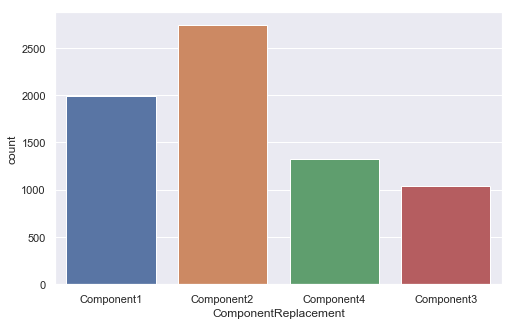

In [80]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=8,5
sns.countplot(x="ComponentReplacement", data=replacement)


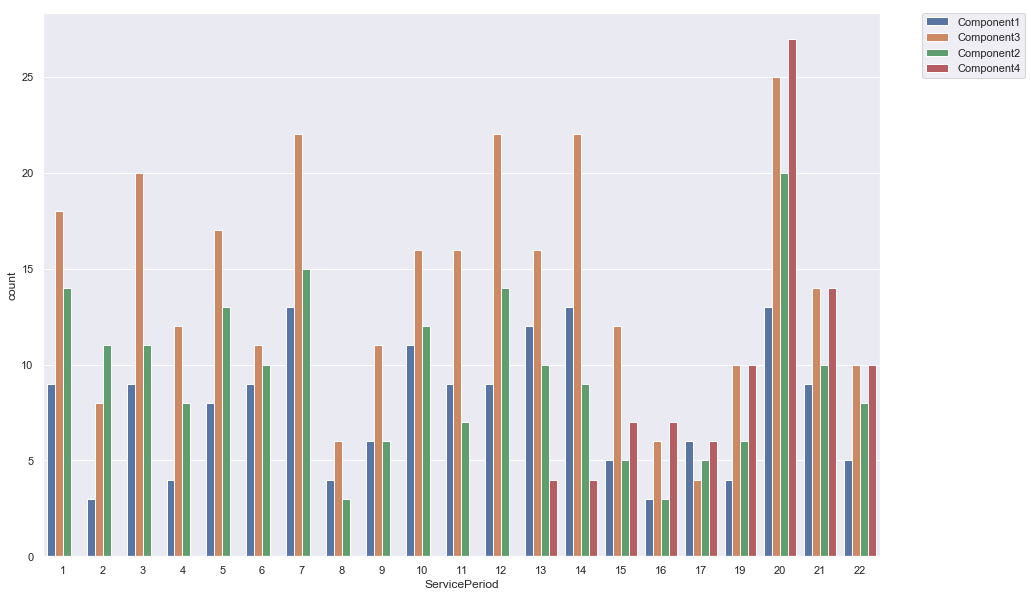

In [203]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
ax = sns.countplot(x='ServicePeriod',hue = "ComponentReplacement", data=replacement[replacement['MachineModel']=='model1'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

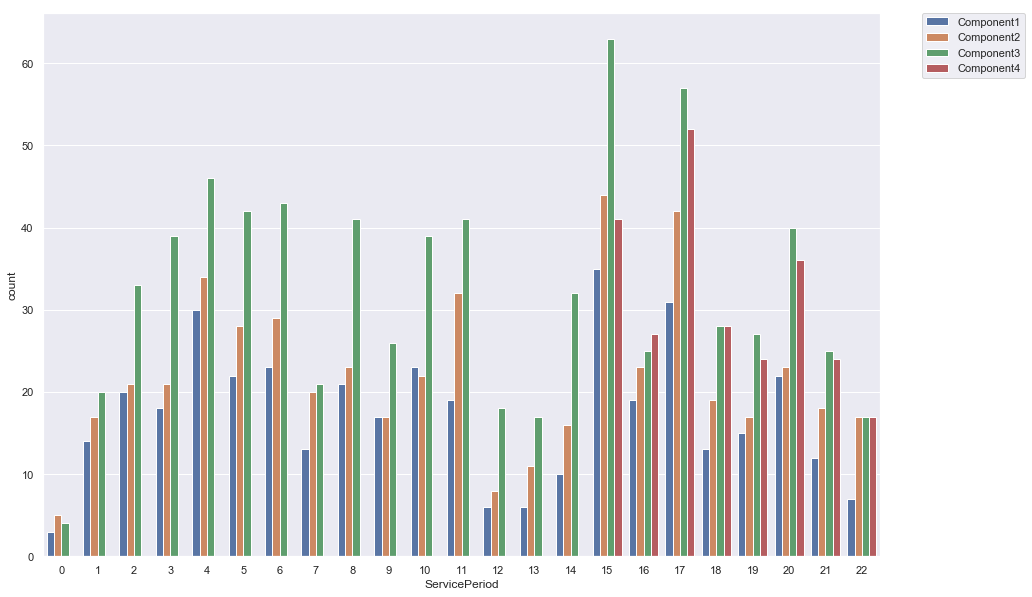

In [204]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
ax = sns.countplot(x='ServicePeriod',hue = "ComponentReplacement", data=replacement[replacement['MachineModel']=='model2'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

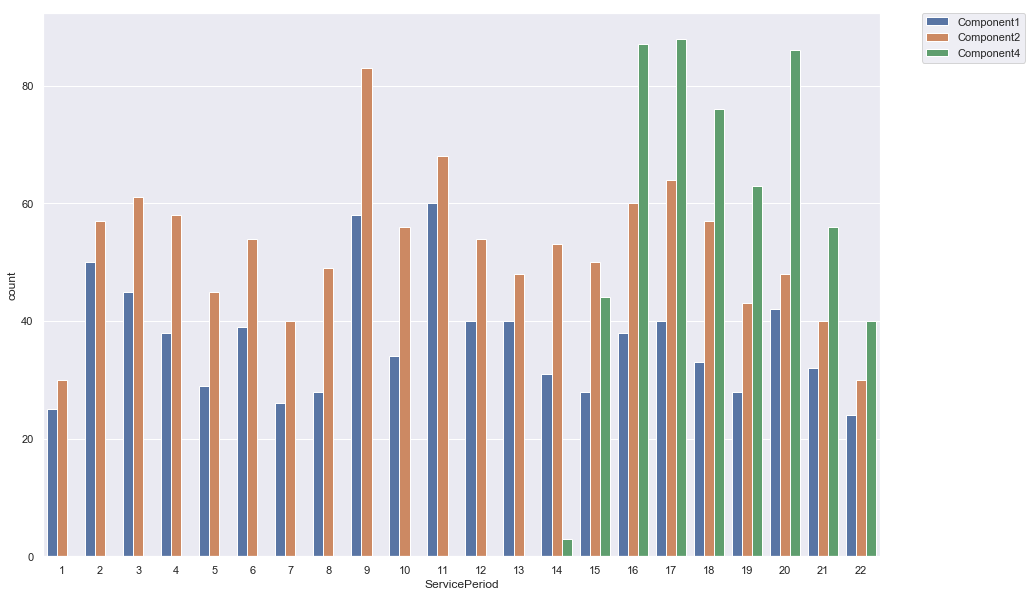

In [205]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
ax = sns.countplot(x='ServicePeriod',hue = "ComponentReplacement", data=replacement[replacement['MachineModel']=='model3'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

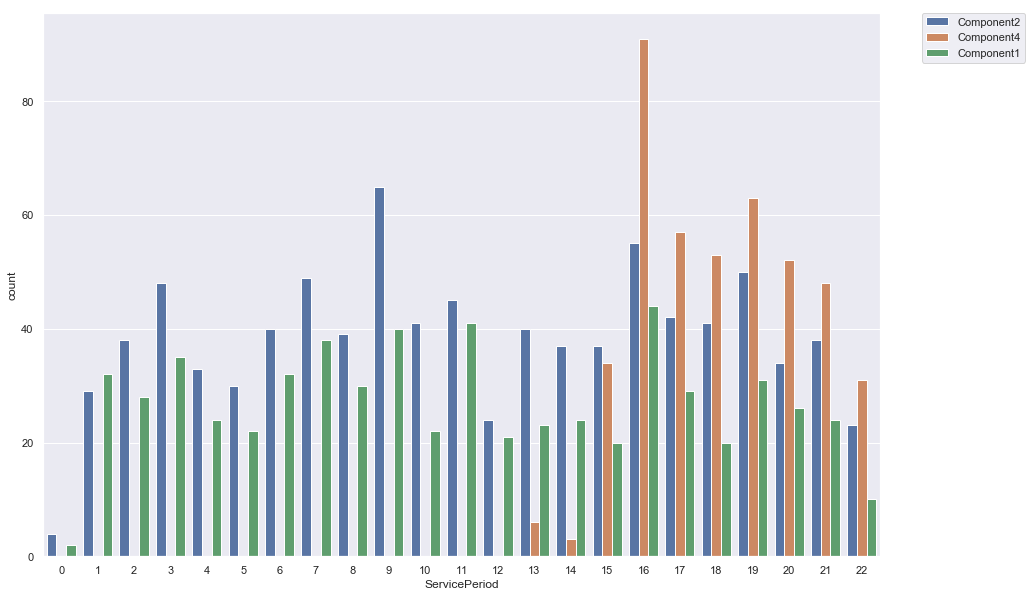

In [206]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
ax = sns.countplot(x='ServicePeriod',hue = "ComponentReplacement", data=replacement[replacement['MachineModel']=='model4'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

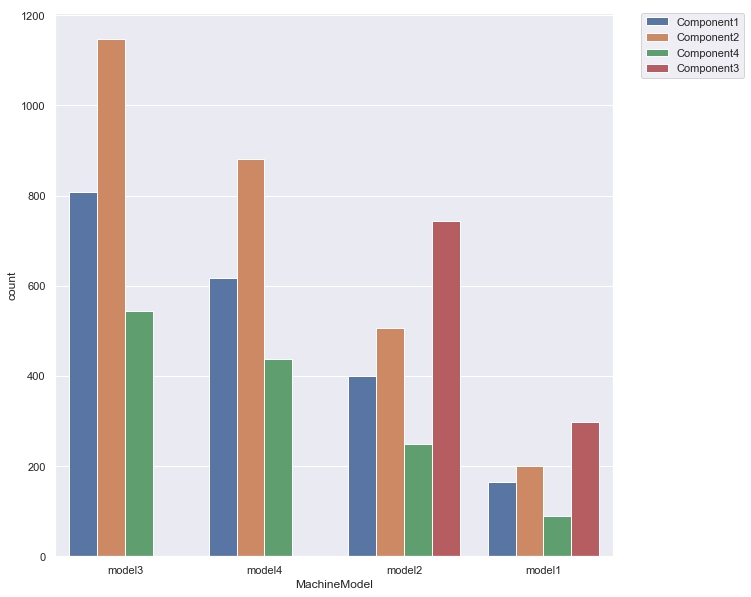

In [164]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=10,10
ax = sns.countplot(x='MachineModel', hue = "ComponentReplacement", data=replacement)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

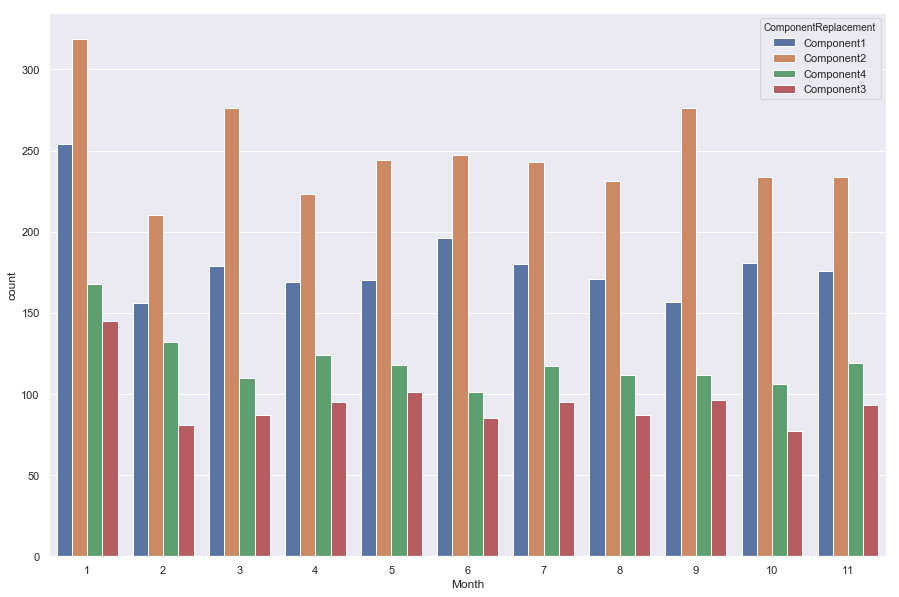

In [81]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=15,10
sns.countplot(x="Month", hue = 'ComponentReplacement', data=replacement)

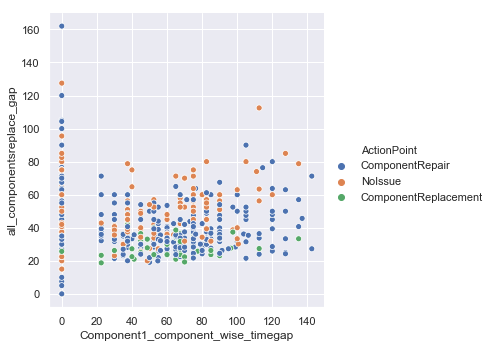

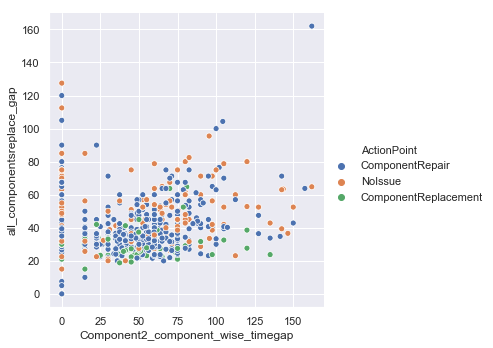

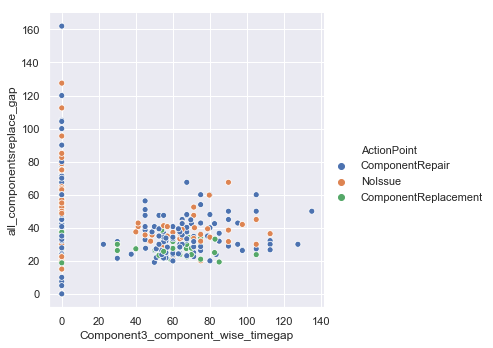

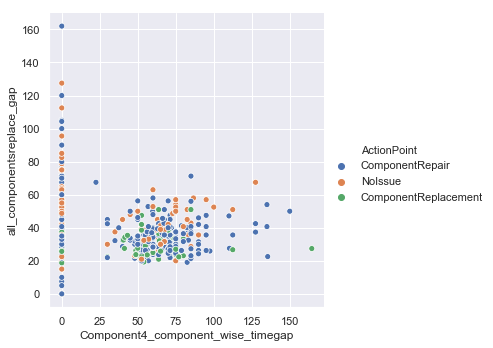

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
# machine = sns.load_dataset("MachinesDetails.csv")
#plt.rcParams['figure.figsize']=12,9
sns.relplot(x="Component1_component_wise_timegap",y= "all_componentsreplace_gap",hue = "ActionPoint", data=replacement_df_train)
sns.relplot(x="Component2_component_wise_timegap",y= "all_componentsreplace_gap",hue = "ActionPoint", data=replacement_df_train)
sns.relplot(x="Component3_component_wise_timegap",y= "all_componentsreplace_gap",hue = "ActionPoint", data=replacement_df_train)
sns.relplot(x="Component4_component_wise_timegap",y= "all_componentsreplace_gap",hue = "ActionPoint", data=replacement_df_train)

# Import Service data

In [85]:
service = pd.read_csv('ComponentServiceLog.csv')

In [149]:
service = pd.merge(service, machine_details, how = 'left', on = 'MachineID')

In [150]:
service.head(5)

Year  Month  Day     Time MachineID ComponentAttended       ServiceType  \
0  2016      6    1  6:00:00  MID10889        Component1  ScheduledService   
1  2016      6    1  6:00:00  MID10889        Component2  ScheduledService   
2  2016      7   31  6:00:00  MID10889        Component3   ComponentRepair   
3  2016      9   14  6:00:00  MID10889        Component4   ComponentRepair   
4  2017      1    7  6:00:00  MID10889        Component1   ComponentRepair   

  YearMonthDay        service_time Final_date  recency  all_components_diff  \
0   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0                  0.0   
1   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0                  0.0   
2   2016-07-31 2016-07-31 06:00:00 2017-12-31    518.0                 60.0   
3   2016-09-14 2016-09-14 06:00:00 2017-12-31    473.0                 45.0   
4   2017-01-07 2017-01-07 06:00:00 2017-12-31    358.0                115.0   

   component_wise_diff  all_services_diff  service_wise_diff MachineModel  \
0                  0.0                0.0                0.0       model3   
1                  0.0                0.0                0.0       model3   
2                  0.0               60.0                0.0       model3   
3                  0.0               45.0                0.0       model3   
4                220.0              115.0              220.0       model3   

   ServicePeriod  
0              7  
1              7  
2              7  
3              7  
4              7

In [87]:
service.tail(5)

Year  Month  Day     Time MachineID ComponentAttended      ServiceType
34485  2017      9   12  6:00:00  MID11228        Component1  ComponentRepair
34486  2017      9   27  6:00:00  MID11228        Component1  ComponentRepair
34487  2017     10   12  6:00:00  MID11228        Component1  ComponentRepair
34488  2017     10   27  6:00:00  MID11228        Component1  ComponentRepair
34489  2017     11   11  6:00:00  MID11228        Component1  ComponentRepair

In [88]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34490 entries, 0 to 34489
Data columns (total 7 columns):
Year                 34490 non-null int64
Month                34490 non-null int64
Day                  34490 non-null int64
Time                 34490 non-null object
MachineID            34490 non-null object
ComponentAttended    34490 non-null object
ServiceType          34490 non-null object
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [89]:
# convering given columns into datetime format and obtaining recency of service

service['YearMonthDay'] = pd.to_datetime(service[['Year', 'Month', 'Day']])
service['service_time']= pd.to_datetime(service['YearMonthDay'].astype(str) + ' ' + service['Time'].astype(str))

service['Final_date']= datetime.strptime(str(20171231), '%Y%m%d').strftime('%Y-%m-%d')
service['Final_date'] = pd.to_datetime(service['Final_date'])

service['recency']= (service['Final_date'] - service['YearMonthDay']).dt.total_seconds()/86400

In [90]:
service.head(5)

Year  Month  Day     Time MachineID ComponentAttended       ServiceType  \
0  2016      6    1  6:00:00  MID10889        Component1  ScheduledService   
1  2016      6    1  6:00:00  MID10889        Component2  ScheduledService   
2  2016      7   31  6:00:00  MID10889        Component3   ComponentRepair   
3  2016      9   14  6:00:00  MID10889        Component4   ComponentRepair   
4  2017      1    7  6:00:00  MID10889        Component1   ComponentRepair   

  YearMonthDay        service_time Final_date  recency  
0   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0  
1   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0  
2   2016-07-31 2016-07-31 06:00:00 2017-12-31    518.0  
3   2016-09-14 2016-09-14 06:00:00 2017-12-31    473.0  
4   2017-01-07 2017-01-07 06:00:00 2017-12-31    358.0

In [91]:
# obtaining time gap between two consecutive services and two consecutive services of same component

service['all_components_diff'] = service.sort_values(['MachineID','YearMonthDay']).groupby('MachineID')['YearMonthDay'].diff()
service['component_wise_diff']= service.sort_values(['MachineID','ComponentAttended','YearMonthDay']).groupby(['MachineID','ComponentAttended'])['YearMonthDay'].diff()
service['all_components_diff']= service['all_components_diff'].dt.total_seconds()/86400
service['component_wise_diff']= service['component_wise_diff'].dt.total_seconds()/86400

In [92]:
# obtaining time gap between two consecutive services and two consecutive services  of same type

service['all_services_diff'] = service.sort_values(['MachineID','YearMonthDay']).groupby('MachineID')['YearMonthDay'].diff()
service['service_wise_diff']= service.sort_values(['MachineID','ComponentAttended','YearMonthDay']).groupby(['MachineID','ComponentAttended'])['YearMonthDay'].diff()
service['all_services_diff']= service['all_services_diff'].dt.total_seconds()/86400
service['service_wise_diff']= service['service_wise_diff'].dt.total_seconds()/86400

In [93]:
service = service.fillna(0)
service.isnull().sum()

Year                   0
Month                  0
Day                    0
Time                   0
MachineID              0
ComponentAttended      0
ServiceType            0
YearMonthDay           0
service_time           0
Final_date             0
recency                0
all_components_diff    0
component_wise_diff    0
all_services_diff      0
service_wise_diff      0
dtype: int64

In [94]:
unique_machines = list(service['MachineID'].unique())


len(unique_machines)

1150

In [95]:

# Using dictionaries to aggregate over each machine and obtain a dictionary of dictionaries


service_dict = {}

for machine in unique_machines:
    temp_df = service.loc[service['MachineID'] == machine]
    
    if len(temp_df)>0:
        u_machine_id = machine

# aggregations done by passing as a parameter which is easy to do many aggregations in a single data set
                
        aggregations = {
            'recency': {
                'last_service_recency' : np.min},
            'component_wise_diff':{
                'service_timegap': np.mean}
        }
        
        machine_service_df = temp_df.groupby(['ComponentAttended']).agg(aggregations)

# iterating over the index of the data frame and converting the values into features
        
        machine_service_dict = {} 
        for i in machine_service_df.index:
            machine_service_dict[str(i)+'_last_service_recency'] = machine_service_df.loc[i]['recency']['last_service_recency']
            machine_service_dict[str(i)+'_service_timegap'] = machine_service_df.loc[i]['component_wise_diff']['service_timegap']
       
        aggregations = {
            'recency': {
                'last_servicetype_recency' : np.min},
            'service_wise_diff':{
                'servicetype_timegap': np.mean}
        }
        
        machine_service_type_df = temp_df.groupby(['ServiceType']).agg(aggregations)
        
        machine_service_type_dict = {} 
        for i in machine_service_type_df.index:
            machine_service_type_dict[str(i)+'_last_servicetype_recency'] = machine_service_type_df.loc[i]['recency']['last_servicetype_recency']
            machine_service_type_dict[str(i)+'_servicetype_timegap'] = machine_service_type_df.loc[i]['service_wise_diff']['servicetype_timegap']   
    
    
        ComponentAttended_series = temp_df.groupby('ComponentAttended').size()
        ComponentAttended_count = {}
        for i in ComponentAttended_series.index:
            ComponentAttended_count[str(i)+'_attend_count'] = ComponentAttended_series[i]
            
        
        ServiceType_series = temp_df.groupby('ServiceType').size()
        ServiceType_count = {}
        for i in ServiceType_series.index:
            ServiceType_count[str(i)+'_servicetype_count'] = ServiceType_series[i]
 
        
        all_componentsservice_gap = temp_df['all_components_diff'].mean()        
        all_componentsservice_dict = {}         
        all_componentsservice_dict['all_componentsservice_gap'] = all_componentsservice_gap
        

        all_servicetype_gap = temp_df['all_services_diff'].mean()       
        all_servicetype_dict = {}         
        all_servicetype_dict['all_servicetype_gap'] = all_servicetype_gap
        
# combining all the dictionaries together into a giant dictionary with all the keys as machine ID's  
        
        service_dict[u_machine_id] = [machine_service_dict, machine_service_type_dict, ComponentAttended_count,ServiceType_count,all_componentsservice_dict,all_servicetype_dict]
        
        del temp_df
    else:
        pass

C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [96]:
service_dict

{'MID10889': [{'Component1_last_service_recency': 268.0,
   'Component1_service_timegap': 77.5,
   'Component2_last_service_recency': 178.00000000000003,
   'Component2_service_timegap': 66.66666666666667,
   'Component3_last_service_recency': 43.0,
   'Component3_service_timegap': 47.5,
   'Component4_last_service_recency': 73.0,
   'Component4_service_timegap': 57.142857142857146},
  {'ComponentRepair_last_servicetype_recency': 43.0,
   'ComponentRepair_servicetype_timegap': 63.4,
   'ScheduledService_last_servicetype_recency': 578.0,
   'ScheduledService_servicetype_timegap': 0.0},
  {'Component1_attend_count': 4,
   'Component2_attend_count': 6,
   'Component3_attend_count': 10,
   'Component4_attend_count': 7},
  {'ComponentRepair_servicetype_count': 25,
   'ScheduledService_servicetype_count': 2},
  {'all_componentsservice_gap': 19.814814814814813},
  {'all_servicetype_gap': 19.814814814814813}],
 'MID10898': [{'Component1_last_service_recency': 144.0,
   'Component1_service_time

In [97]:
 len(service_dict)

1150

In [98]:
# converting dictionary of dictionaries into dictionary with multiple columns


show_service_dict = {}

for key, value in service_dict.items():
    value_dict = {}
    
    for k, v in value[0].items():
        value_dict[k]= v
    
    for k, v in value[1].items():
        value_dict[k]= v
    
    for k, v in value[2].items():
        value_dict[k]= v
        
    for k, v in value[3].items():
        value_dict[k]= v
    
    for k, v in value[4].items():
        value_dict[k]= v
    
    for k, v in value[5].items():
        value_dict[k]= v
    

    show_service_dict[key]= value_dict

In [99]:
service_df = pd.DataFrame.from_dict(show_service_dict,orient='index').fillna(0)

In [100]:
service_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, MID10801 to MID12000
Data columns (total 20 columns):
Component1_last_service_recency              1150 non-null float64
Component1_service_timegap                   1150 non-null float64
Component2_last_service_recency              1150 non-null float64
Component2_service_timegap                   1150 non-null float64
Component3_last_service_recency              1150 non-null float64
Component3_service_timegap                   1150 non-null float64
Component4_last_service_recency              1150 non-null float64
Component4_service_timegap                   1150 non-null float64
ComponentRepair_last_servicetype_recency     1150 non-null float64
ComponentRepair_servicetype_timegap          1150 non-null float64
ScheduledService_last_servicetype_recency    1150 non-null float64
ScheduledService_servicetype_timegap         1150 non-null float64
Component1_attend_count                      1150 non-null int64
Component2_attend_

In [104]:
service.head()

Year  Month  Day     Time MachineID ComponentAttended       ServiceType  \
0  2016      6    1  6:00:00  MID10889        Component1  ScheduledService   
1  2016      6    1  6:00:00  MID10889        Component2  ScheduledService   
2  2016      7   31  6:00:00  MID10889        Component3   ComponentRepair   
3  2016      9   14  6:00:00  MID10889        Component4   ComponentRepair   
4  2017      1    7  6:00:00  MID10889        Component1   ComponentRepair   

  YearMonthDay        service_time Final_date  recency  all_components_diff  \
0   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0                  0.0   
1   2016-06-01 2016-06-01 06:00:00 2017-12-31    578.0                  0.0   
2   2016-07-31 2016-07-31 06:00:00 2017-12-31    518.0                 60.0   
3   2016-09-14 2016-09-14 06:00:00 2017-12-31    473.0                 45.0   
4   2017-01-07 2017-01-07 06:00:00 2017-12-31    358.0                115.0   

   component_wise_diff  all_services_diff  service_wise_diff  
0                  0.0                0.0                0.0  
1                  0.0                0.0                0.0  
2                  0.0               60.0                0.0  
3                  0.0               45.0                0.0  
4                220.0              115.0              220.0

In [102]:
service_df.shape

(1150, 20)

In [103]:
service_df = service_df.reset_index()
service_df.rename(columns={'index':'MachineID'}, inplace=True)
service_df_train = pd.merge(service_df, train, how='inner', on = ['MachineID'])

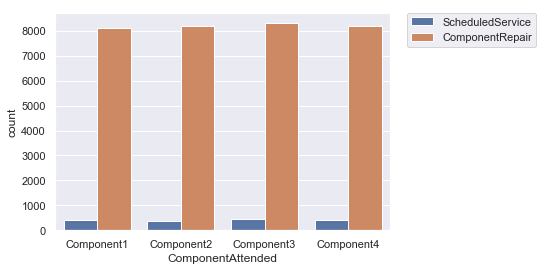

In [156]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=6,4
ax = sns.countplot(x="ComponentAttended", hue = 'ServiceType', data=service)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

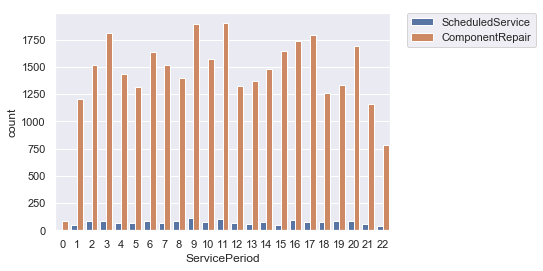

In [157]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=6,4
ax = sns.countplot(x="ServicePeriod", hue = 'ServiceType', data=service)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

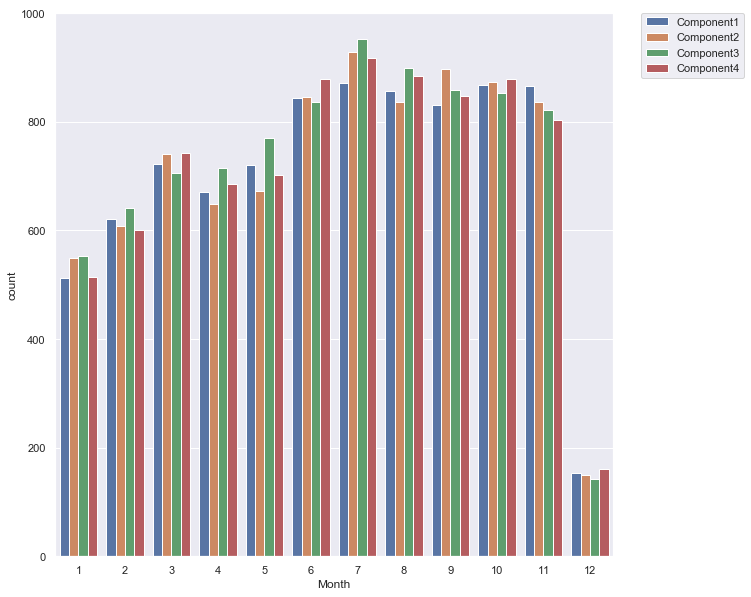

In [119]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=10,10
ax = sns.countplot(x="Month", hue = 'ComponentAttended', data=service)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

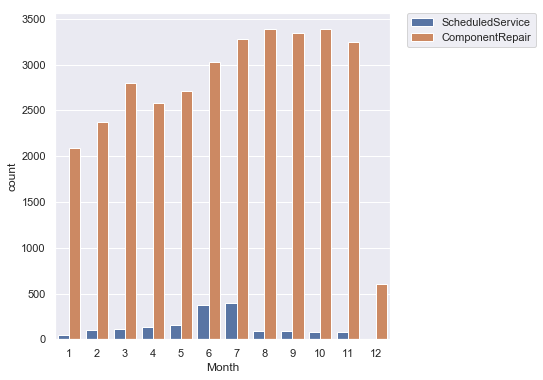

In [122]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=6,6
ax = sns.countplot(x="Month", hue = 'ServiceType', data=service)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

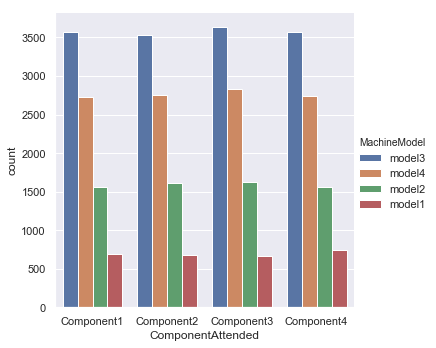

In [153]:
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize']=6,6
ax = sns.catplot(x="ComponentAttended", hue = 'MachineModel', data=service, kind='count')

# import the operating conditions data

In [207]:
sensor = pd.read_csv('OperatingConditionsData.csv')

In [223]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211500 entries, 0 to 9211499
Data columns (total 11 columns):
Year            int64
Month           int64
Day             int64
Time            object
MachineID       object
Sensor1         float64
Sensor2         float64
Sensor3         float64
Sensor4         float64
YearMonthDay    datetime64[ns]
sensor_time     datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 773.1+ MB


In [226]:
# sensor_last_month.to_csv('sensor_last_month')

In [220]:
sensor.shape

(9211500, 11)

In [219]:
list(sensor['MachineID'].unique())

['MID10889',
 'MID10898',
 'MID10928',
 'MID10847',
 'MID10825',
 'MID10828',
 'MID10826',
 'MID10913',
 'MID10869',
 'MID10827',
 'MID10914',
 'MID10903',
 'MID10841',
 'MID10820',
 'MID10811',
 'MID10806',
 'MID10876',
 'MID10812',
 'MID10842',
 'MID10860',
 'MID10935',
 'MID10837',
 'MID10947',
 'MID10899',
 'MID10882',
 'MID10862',
 'MID10829',
 'MID10941',
 'MID10884',
 'MID10863',
 'MID10890',
 'MID10895',
 'MID10885',
 'MID10851',
 'MID10870',
 'MID10852',
 'MID10877',
 'MID10948',
 'MID10821',
 'MID10866',
 'MID10816',
 'MID10915',
 'MID10855',
 'MID10916',
 'MID10917',
 'MID10920',
 'MID10839',
 'MID10891',
 'MID10853',
 'MID10801',
 'MID10936',
 'MID10864',
 'MID10892',
 'MID10813',
 'MID10896',
 'MID10942',
 'MID10822',
 'MID10830',
 'MID10831',
 'MID10943',
 'MID10802',
 'MID10840',
 'MID10871',
 'MID10912',
 'MID10939',
 'MID10808',
 'MID10918',
 'MID10933',
 'MID10856',
 'MID10814',
 'MID10809',
 'MID10911',
 'MID10929',
 'MID10949',
 'MID10878',
 'MID10904',
 'MID10886',

In [212]:
sensor.describe()

Year         Month           Day       Sensor1       Sensor2  \
count  9211500.0  9.211500e+06  9.211500e+06  9.211500e+06  9.211500e+06   
mean      2017.0  6.021723e+00  1.570562e+01  1.707563e+02  4.466138e+02   
std          0.0  3.152833e+00  8.776002e+00  1.550236e+01  5.260906e+01   
min       2017.0  1.000000e+00  1.000000e+00  8.778085e+01  1.021730e+02   
25%       2017.0  3.000000e+00  8.000000e+00  1.602922e+02  4.123540e+02   
50%       2017.0  6.000000e+00  1.600000e+01  1.705804e+02  4.476016e+02   
75%       2017.0  9.000000e+00  2.300000e+01  1.810005e+02  4.821237e+02   
max       2017.0  1.100000e+01  3.100000e+01  2.726818e+02  7.001998e+02   

            Sensor3       Sensor4  
count  9.211500e+06  9.211500e+06  
mean   1.008400e+02  4.034999e+01  
std    1.099897e+01  5.338079e+00  
min    4.898661e+01  1.435719e+01  
25%    9.352128e+01  3.676328e+01  
50%    1.004201e+02  4.021124e+01  
75%    1.075329e+02  4.374541e+01  
max    1.952711e+02  7.910749e+01

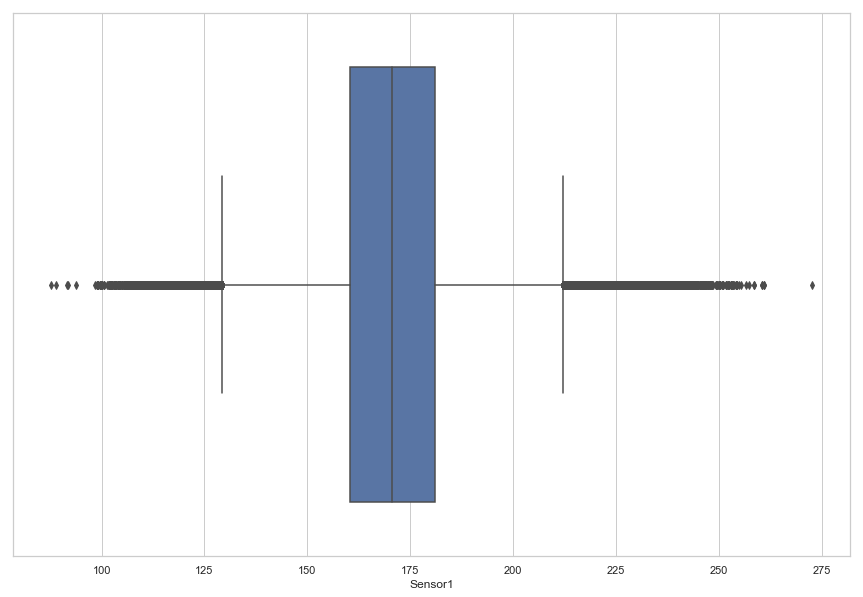

In [215]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=sensor["Sensor1"])


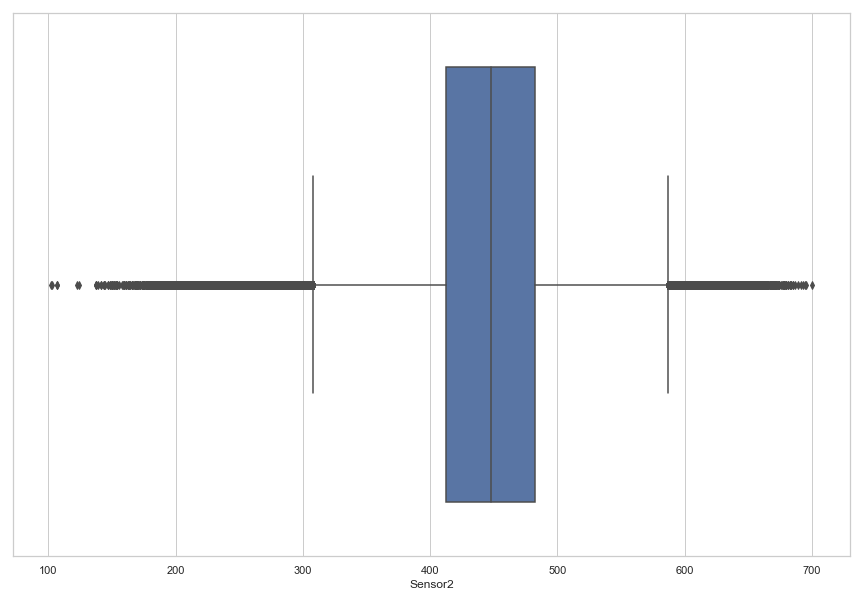

In [214]:
sns.boxplot(x=sensor["Sensor2"])

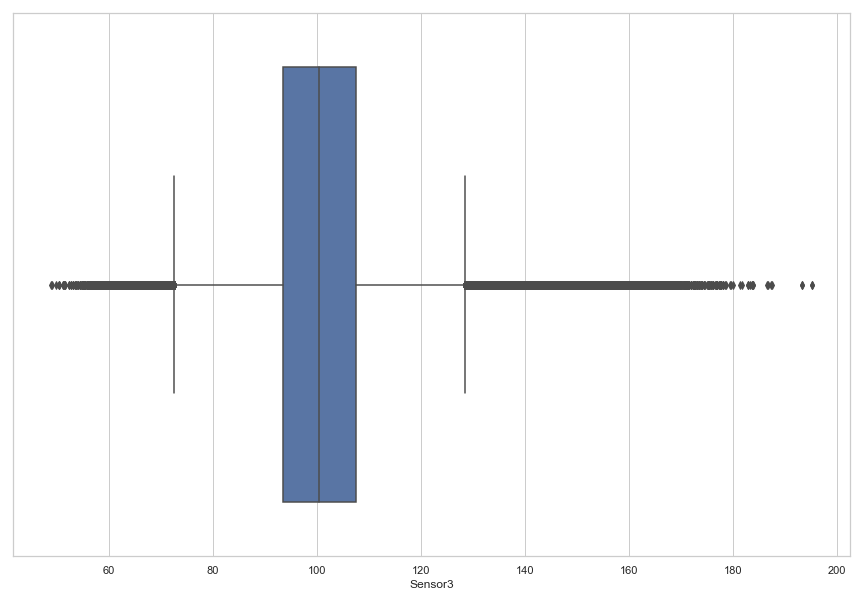

In [216]:
sns.boxplot(x=sensor["Sensor3"])

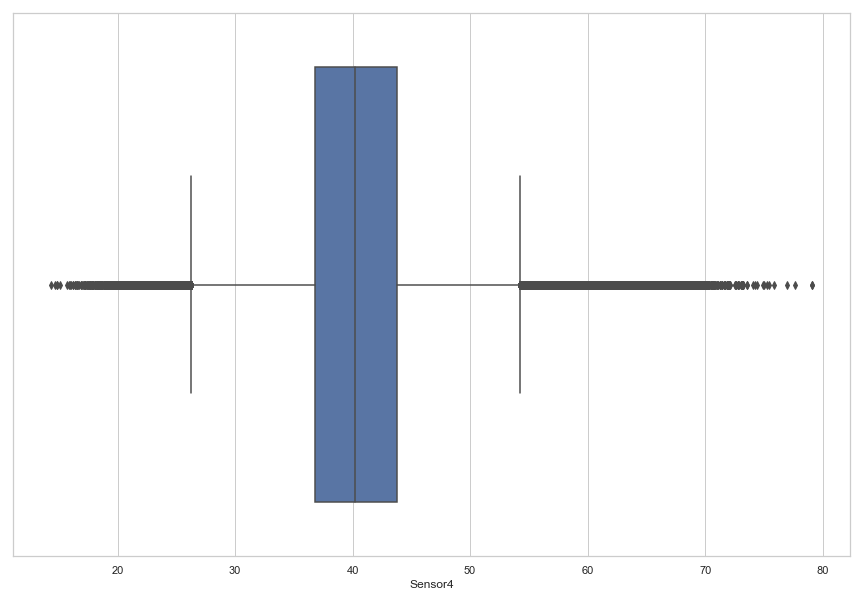

In [217]:
sns.boxplot(x=sensor["Sensor4"])

In [210]:
sensor.head(5)

Year  Month  Day      Time MachineID     Sensor1     Sensor2     Sensor3  \
0  2017      1    1  06:00:00  MID10889  190.860059  402.956047   99.838060   
1  2017      1    1  07:00:00  MID10889  168.825805  437.673549  116.476080   
2  2017      1    1  08:00:00  MID10889  157.674385  462.601905   95.230526   
3  2017      1    1  09:00:00  MID10889  142.552238  515.138959  117.245483   
4  2017      1    1  10:00:00  MID10889  176.730195  448.725899   95.536274   

     Sensor4 YearMonthDay         sensor_time  
0  32.369191   2017-01-01 2017-01-01 06:00:00  
1  32.046604   2017-01-01 2017-01-01 07:00:00  
2  53.281389   2017-01-01 2017-01-01 08:00:00  
3  36.525593   2017-01-01 2017-01-01 09:00:00  
4  44.752883   2017-01-01 2017-01-01 10:00:00

In [209]:
# conveting input features into date time

sensor['YearMonthDay'] = pd.to_datetime(sensor[['Year', 'Month', 'Day']])
sensor['sensor_time']= pd.to_datetime(sensor['YearMonthDay'].astype(str) + ' ' + sensor['Time'].astype(str))



In [80]:
sensor.to_csv('sensor.csv')

In [81]:
# obtain the receny of snesor data

sensor['Final_date']= datetime.strptime(str(20171231), '%Y%m%d').strftime('%Y-%m-%d')
sensor['Final_date'] = pd.to_datetime(sensor['Final_date'])

sensor['recency']= (sensor['Final_date'] - sensor['YearMonthDay']).dt.total_seconds()/86400

In [82]:
# obtain the day wise average of sensor readings
aggregations = {
            'recency': {'recency' : 'mean'},
            'YearMonthDay': {'productivity': 'count'},
            'Sensor1' :{'Sensor1' : 'mean'},
            'Sensor2' :{'Sensor2' : 'mean'},
            'Sensor3' :{'Sensor3' : 'mean'},
            'Sensor4' :{'Sensor4' : 'mean'}            
        }

In [83]:
machine_sensor_df = sensor.groupby(['MachineID', 'YearMonthDay']).agg(aggregations)

C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [84]:
machine_sensor_df= pd.DataFrame(machine_sensor_df.reset_index())

In [12]:
machine_sensor_df.head(5)

MachineID YearMonthDay  recency  productivity     Sensor1     Sensor2  \
0  MID10801     1/1/2017      364            18  173.680225  428.967162   
1  MID10801     1/2/2017      363            24  168.489299  444.274076   
2  MID10801     1/3/2017      362            24  167.032661  462.179037   
3  MID10801     1/4/2017      361            24  161.782109  449.158087   
4  MID10801     1/5/2017      360            24  169.104396  462.371959   

      Sensor3    Sensor4  inverse_recency  w_sensor1  w_sensor2  w_sensor3  \
0  104.625126  37.449952         0.002747   0.477143   1.178481   0.287432   
1  100.254136  38.667671         0.002755   0.464158   1.223896   0.276182   
2  101.387985  39.416188         0.002762   0.461416   1.276738   0.280077   
3   98.719022  39.337736         0.002770   0.448150   1.244205   0.273460   
4   97.555169  39.184373         0.002778   0.469734   1.284367   0.270987   

   w_sensor4  
0   0.102884  
1   0.106523  
2   0.108884  
3   0.108969  
4   0.108845

In [534]:
machine_sensor_df.to_csv('machine_sensor.csv')

In [214]:
machine_sensor_df= pd.read_csv('machine_sensor.csv')

In [215]:
# obtain the weighted average of the sensor data by giving high weightage to the recent reading 
machine_sensor_df['inverse_recency'] = 1/machine_sensor_df['recency']

In [216]:
machine_sensor_df['w_sensor1'] = machine_sensor_df['Sensor1'] * machine_sensor_df['inverse_recency']
machine_sensor_df['w_sensor2'] = machine_sensor_df['Sensor2'] * machine_sensor_df['inverse_recency']
machine_sensor_df['w_sensor3'] = machine_sensor_df['Sensor3'] * machine_sensor_df['inverse_recency']
machine_sensor_df['w_sensor4'] = machine_sensor_df['Sensor4'] * machine_sensor_df['inverse_recency']

In [217]:
aggregations = {
            'inverse_recency': {'inverse_recency' : 'mean'},
            'w_sensor1' :{'w_sensor1' : 'mean'},
            'w_sensor2' :{'w_sensor2' : 'mean'},
            'w_sensor3' :{'w_sensor3' : 'mean'},
            'w_sensor4' :{'w_sensor4' : 'mean'},        
        }

In [218]:
sensor_df = machine_sensor_df.groupby(['MachineID']).agg(aggregations)

C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [219]:
sensor_df = pd.DataFrame(sensor_df.reset_index())

In [160]:
sensor_df.to_csv('sensor_df_final.csv')

In [220]:
sensor_df = pd.read_csv('sensor_df.csv')

In [221]:
sensor_df['sensor1_weighted']= sensor_df['w_sensor1']/sensor_df['inverse_recency']
sensor_df['sensor2_weighted']= sensor_df['w_sensor2']/sensor_df['inverse_recency']
sensor_df['sensor3_weighted']= sensor_df['w_sensor3']/sensor_df['inverse_recency']
sensor_df['sensor4_weighted']= sensor_df['w_sensor4']/sensor_df['inverse_recency']

In [222]:
sensor_df = sensor_df[['MachineID','sensor1_weighted', 'sensor2_weighted','sensor3_weighted', 'sensor4_weighted']]

In [353]:
sensor_df.head(5)

MachineID  Min of Sensor1  Recency_sensor1  Min of Sensor2  Recency_sensor2  \
0  MID10801      130.235667                6      246.570555                1   
1  MID10802      131.375493                3      261.864529                7   
2  MID10803      141.019200                4      348.684700                3   
3  MID10804      134.757200                1      325.909500                4   
4  MID10805      136.483700                6      332.806200                4   

   Min of Sensor3  Recency_sensor3  Min of Sensor4  Recency_sensor4  
0       75.985809                2       24.327647                4  
1       67.746004                7       29.133667                4  
2       79.209040                7       28.776730                1  
3       70.670410                6       26.686310                3  
4       63.970130                5       27.658130                4

In [352]:
sensor_df = pd.read_csv("sensor_last_week_min.csv")

In [235]:
data.head(5)

MachineID      ActionPoint
0  MID11001  ComponentRepair
1  MID11002  ComponentRepair
2  MID11003          NoIssue
3  MID11004          NoIssue
4  MID11005  ComponentRepair

In [354]:
# combine sensor aggregated to into data which has both test and train data

data = pd.merge(data, sensor_df,  how='left', on= ['MachineID'])

In [334]:
data.head(5)

MachineID      ActionPoint  Min of Sensor1  Recency_sensor1  Min of Sensor2  \
0  MID11001  ComponentRepair        127.7894                4        339.0608   
1  MID11002  ComponentRepair        130.9371                2        312.2235   
2  MID11003          NoIssue        141.2965                4        295.9113   
3  MID11004          NoIssue        120.7788                2        261.0904   
4  MID11005  ComponentRepair        130.7441                7        319.1743   

   Recency_sensor2  Min of Sensor3  Recency_sensor3  Min of Sensor4  \
0                5        80.36928                7        26.36628   
1                2        73.28983                7        29.35122   
2                5        73.36698                3        24.88754   
3                6        72.32770                6        28.36289   
4                6        73.98000                2        22.53532   

   Recency_sensor4  
0                3  
1                3  
2                7  
3                5  
4                5

In [241]:
complaints_df.head(5)

MachineID  error1_last_error_recency  error1_error_wise_timegap  \
0  MID10801                       46.0                  78.333333   
1  MID10802                      220.0                  21.000000   
2  MID10803                      121.0                  33.833333   
3  MID10804                      116.0                  35.000000   
4  MID10805                       31.0                  93.666667   

   error2_last_error_recency  error2_error_wise_timegap  \
0                       31.0                      67.50   
1                       82.0                      85.00   
2                       54.0                      41.25   
3                      101.0                      56.25   
4                      106.0                      74.50   

   error3_last_error_recency  error3_error_wise_timegap  \
0                       31.0                      54.00   
1                       82.0                      85.00   
2                       54.0                      41.25   
3                      161.0                      41.25   
4                      106.0                      87.00   

   error4_last_error_recency  error4_error_wise_timegap  \
0                      205.0                       2.00   
1                      231.0                       0.00   
2                       36.0                      50.50   
3                       41.0                      50.00   
4                       61.0                      63.75   

   error5_last_error_recency  error5_error_wise_timegap  error1_count  \
0                       76.0                       60.0           3.0   
1                      127.0                       67.5           2.0   
2                       99.0                       75.0           6.0   
3                       71.0                       60.0           3.0   
4                       46.0                       63.0           3.0   

   error2_count  error3_count  error4_count  error5_count  all_errors_diff  
0           4.0           5.0           2.0           4.0        15.833333  
1           3.0           3.0           1.0           2.0        23.181818  
2           4.0           4.0           6.0           3.0        13.173913  
3           4.0           4.0           6.0           4.0        14.285714  
4           2.0           2.0           4.0           5.0        20.625000

In [228]:
complaints_df = complaints_df.reset_index()
complaints_df.rename(columns={'index':'MachineID'}, inplace=True)

In [355]:
# merging the complaints data into combined data which has both test and train
data = pd.merge(data, complaints_df,  how='left', on= ['MachineID'])
data.shape

(1000, 28)

In [336]:
complaints_df.head(5)

MachineID  error1_last_error_recency  error1_error_wise_timegap  \
0  MID10801                       46.0                  78.333333   
1  MID10802                      220.0                  21.000000   
2  MID10803                      121.0                  33.833333   
3  MID10804                      116.0                  35.000000   
4  MID10805                       31.0                  93.666667   

   error2_last_error_recency  error2_error_wise_timegap  \
0                       31.0                      67.50   
1                       82.0                      85.00   
2                       54.0                      41.25   
3                      101.0                      56.25   
4                      106.0                      74.50   

   error3_last_error_recency  error3_error_wise_timegap  \
0                       31.0                      54.00   
1                       82.0                      85.00   
2                       54.0                      41.25   
3                      161.0                      41.25   
4                      106.0                      87.00   

   error4_last_error_recency  error4_error_wise_timegap  \
0                      205.0                       2.00   
1                      231.0                       0.00   
2                       36.0                      50.50   
3                       41.0                      50.00   
4                       61.0                      63.75   

   error5_last_error_recency  error5_error_wise_timegap  error1_count  \
0                       76.0                       60.0           3.0   
1                      127.0                       67.5           2.0   
2                       99.0                       75.0           6.0   
3                       71.0                       60.0           3.0   
4                       46.0                       63.0           3.0   

   error2_count  error3_count  error4_count  error5_count  all_errors_diff  
0           4.0           5.0           2.0           4.0        15.833333  
1           3.0           3.0           1.0           2.0        23.181818  
2           4.0           4.0           6.0           3.0        13.173913  
3           4.0           4.0           6.0           4.0        14.285714  
4           2.0           2.0           4.0           5.0        20.625000

In [299]:
data.shape

(1000, 28)

In [252]:
service_df.head(5)

MachineID  Component1_last_service_recency  Component1_service_timegap  \
0  MID10801                             45.0                  100.600000   
1  MID10802                            246.0                   45.666667   
2  MID10803                            128.0                   62.500000   
3  MID10804                             55.0                   38.111111   
4  MID10805                             75.0                   62.875000   

   Component2_last_service_recency  Component2_service_timegap  \
0                             90.0                   50.428571   
1                             81.0                   46.700000   
2                             53.0                   66.428571   
3                            115.0                   46.625000   
4                             90.0                   85.600000   

   Component3_last_service_recency  Component3_service_timegap  \
0                            120.0                   56.857143   
1                             36.0                   75.333333   
2                             38.0                   77.142857   
3                             40.0                   52.250000   
4                             60.0                   88.600000   

   Component4_last_service_recency  Component4_service_timegap  \
0                             75.0                   57.250000   
1                             36.0                   43.818182   
2                             98.0                   90.000000   
3                             40.0                   41.000000   
4                             45.0                   38.909091   

   ComponentRepair_last_servicetype_recency         ...           \
0                                      45.0         ...            
1                                      36.0         ...            
2                                      38.0         ...            
3                                      40.0         ...            
4                                      45.0         ...            

   ScheduledService_last_servicetype_recency  \
0                                      548.0   
1                                      548.0   
2                                      548.0   
3                                        0.0   
4                                       60.0   

   ScheduledService_servicetype_timegap  Component1_attend_count  \
0                                   0.0                        5   
1                                   0.0                        3   
2                                   0.0                        6   
3                                   0.0                        9   
4                                  37.5                        8   

   Component2_attend_count  Component3_attend_count  Component4_attend_count  \
0                        7                        7                        8   
1                       10                        6                       11   
2                        7                        7                        5   
3                        8                        8                        8   
4                        5                        5                       11   

   ComponentRepair_servicetype_count  ScheduledService_servicetype_count  \
0                                 26                                 1.0   
1                                 29                                 1.0   
2                                 23                                 2.0   
3                                 33                                 0.0   
4                                 27                                 2.0   

   all_componentsservice_gap  all_servicetype_gap  
0                  18.629630            18.629630  
1                  17.066667            17.066667  
2                  21.600000            21.600000  
3                  13.575758            13.575758  
4                  18.379310            18.379310

In [237]:
service_df = service_df.reset_index()
service_df.rename(columns={'index':'MachineID'}, inplace=True)

In [356]:
# merge service data into test and train

data = pd.merge(data, service_df,  how='left', on= ['MachineID'])

In [357]:
data.head(5)

MachineID      ActionPoint MachineModel  ServicePeriod  Min of Sensor1  \
0  MID11001  ComponentRepair       model4             21        127.7894   
1  MID11002  ComponentRepair       model1             21        130.9371   
2  MID11003          NoIssue       model3             22        141.2965   
3  MID11004          NoIssue       model4             22        120.7788   
4  MID11005  ComponentRepair       model3             22        130.7441   

   Recency_sensor1  Min of Sensor2  Recency_sensor2  Min of Sensor3  \
0                4        339.0608                5        80.36928   
1                2        312.2235                2        73.28983   
2                4        295.9113                5        73.36698   
3                2        261.0904                6        72.32770   
4                7        319.1743                6        73.98000   

   Recency_sensor3         ...           \
0                7         ...            
1                7         ...            
2                3         ...            
3                6         ...            
4                2         ...            

   ScheduledService_last_servicetype_recency  \
0                                      183.0   
1                                       60.0   
2                                      244.0   
3                                      244.0   
4                                        0.0   

   ScheduledService_servicetype_timegap  Component1_attend_count  \
0                                  83.0                        8   
1                                   7.5                        6   
2                                  15.0                        6   
3                                  40.0                        6   
4                                   0.0                        7   

   Component2_attend_count  Component3_attend_count  Component4_attend_count  \
0                       11                        6                        5   
1                        6                       11                        7   
2                        9                        7                        9   
3                        8                        8                        8   
4                        5                        6                       11   

   ComponentRepair_servicetype_count  ScheduledService_servicetype_count  \
0                                 25                                 5.0   
1                                 28                                 2.0   
2                                 29                                 2.0   
3                                 27                                 3.0   
4                                 29                                 0.0   

   all_componentsservice_gap  all_servicetype_gap  
0                  17.166667            17.166667  
1                  17.766667            17.766667  
2                  15.612903            15.612903  
3                  17.633333            17.633333  
4                  15.448276            15.448276  

[5 rows x 48 columns]

In [360]:
data.shape

(1000, 51)

In [359]:
ModelDummyVars = pd.get_dummies(data['MachineModel'])
data = data.join(ModelDummyVars).drop(['MachineModel'], axis=1)

In [454]:
data.to_csv('prep_processed_complete_data.csv')

In [361]:
train_data = data[data['ActionPoint']!= "test_data"]

In [362]:
train_data.shape

(674, 51)

In [363]:
test =  data[data['ActionPoint']== "test_data"]

In [364]:
del test['ActionPoint']

In [365]:
test.shape

(326, 50)

In [366]:
train_data.to_csv('train_preprocessed_3.csv')
test.to_csv('test_preprocessed_3.csv')

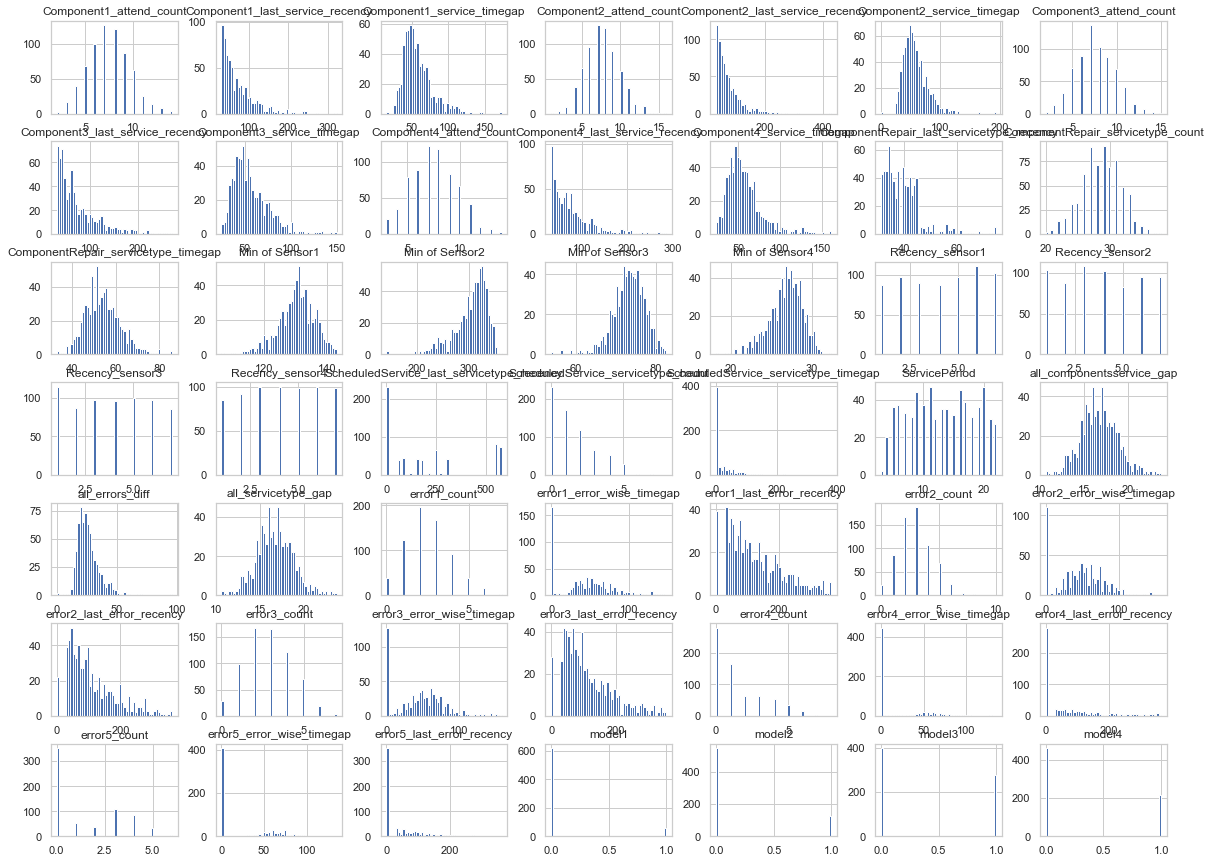

In [599]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [176]:
# train_data['ActionPoint'] = train_data['ActionPoint'].astype('category')

C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


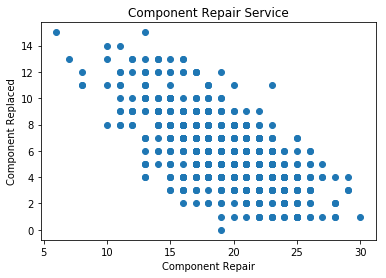

In [172]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.scatter(train_data['ComponentRepair_ComponentRepair_count'],train_data['ComponentRepair_ComponentReplaced_count'],marker='o')

plt.title('Component Repair Service')
plt.xlabel('Component Repair')
plt.ylabel('Component Replaced')
plt.show()



In [439]:
train_data = data[data['ActionPoint']!= "test_data"]
test =  data[data['ActionPoint']== "test_data"]
del test['ActionPoint']

# Model building

In [46]:
# train_data = pd.read_csv('train_preprocessed_2.csv')
# test = pd.read_csv('test_preprocessed_2.csv')

In [367]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 51 columns):
MachineID                                    674 non-null object
ActionPoint                                  674 non-null object
ServicePeriod                                674 non-null int64
Min of Sensor1                               674 non-null float64
Recency_sensor1                              674 non-null int64
Min of Sensor2                               674 non-null float64
Recency_sensor2                              674 non-null int64
Min of Sensor3                               674 non-null float64
Recency_sensor3                              674 non-null int64
Min of Sensor4                               674 non-null float64
Recency_sensor4                              674 non-null int64
error1_last_error_recency                    674 non-null float64
error1_error_wise_timegap                    674 non-null float64
error2_last_error_recency                    674 

In [368]:
train_data.set_index('MachineID', inplace=True)
test.set_index('MachineID', inplace=True)

In [369]:
X= train_data.drop(['ActionPoint'], axis=1, inplace=False)
y= train_data.ActionPoint

In [489]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,random_state=23,stratify = y)

In [441]:
os.chdir('C:\\personal\\Insofe\\PHD_42\\Machine learning\\Output\\Stacking')


In [443]:
X_train.to_csv('train.csv')
X_valid.to_csv('valid.csv')


# Logistic Regression

In [521]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1,random_state=46,stratify = y)

from  sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_1 = LogisticRegression(class_weight= 'balanced', solver = 'saga', penalty = 'l2', C = 0.001)
clf_1.fit(X_train,y_train)

pred_train_1 = clf_1.predict(X_train)
print(classification_report(y_train,pred_train_1))

pred_valid_1 = clf_1.predict(X_valid)
print(classification_report(y_valid,pred_valid_1))

print(accuracy_score(y_valid, pred_valid_1) )



                      precision    recall  f1-score   support

     ComponentRepair       0.76      0.51      0.61       289
ComponentReplacement       0.27      0.61      0.37        49
             NoIssue       0.50      0.62      0.55       133

         avg / total       0.63      0.55      0.57       471

                      precision    recall  f1-score   support

     ComponentRepair       0.70      0.46      0.56       124
ComponentReplacement       0.18      0.43      0.25        21
             NoIssue       0.53      0.66      0.58        58

         avg / total       0.60      0.51      0.53       203

0.5123152709359606


C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [477]:
# from sklearn.metrics import roc_curve
# y_pred_prob = clf_1.predict_proba(X_valid)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr, label='Logistic Regression')
# plt.xlabel('False Positive Rate’)
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve')
# plt.show();

In [523]:
pred_test_1 = clf_1.predict(test)

print(len(pred_test_1))

326


In [433]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid,pred_valid_1)

In [434]:
conf_mat

array([[57, 35, 32],
       [10,  9,  2],
       [14,  6, 38]], dtype=int64)

In [531]:
X_train1 = X_train.reset_index(drop=False)
X_valid1 = X_valid.reset_index(drop=False)

index_train = X_train1['MachineID']
index_valid = X_valid1['MachineID']
# index_1 = data[data['ActionPoint']== "test_data"]['MachineID']

In [534]:
pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_Log = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_log= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_Log = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_Log.to_csv('train_Log.csv')
valid_log.to_csv('valid_log.csv')
test_Log.to_csv('test_Log.csv')

In [478]:
model_1 = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)

# pd.concat([products_df.reset_index(drop=True),cluster_df.reset_index(drop=True)], axis=1)

In [316]:
train['ActionPoint'].value_counts()

ComponentRepair         289
NoIssue                 133
ComponentReplacement     49
Name: ActionPoint, dtype: int64

In [317]:
validation['ActionPoint'].value_counts()

ComponentRepair         124
NoIssue                  58
ComponentReplacement     21
Name: ActionPoint, dtype: int64

# KNN Algorithm

In [372]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

train_predictions = knn.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

predictions= knn.predict(X_valid)
print(confusion_matrix(y_valid, predictions))
print(classification_report(y_valid, predictions))

[[278   3   8]
 [ 41   5   3]
 [109   1  23]]
                      precision    recall  f1-score   support

     ComponentRepair       0.65      0.96      0.78       289
ComponentReplacement       0.56      0.10      0.17        49
             NoIssue       0.68      0.17      0.28       133

         avg / total       0.65      0.65      0.57       471

[[115   2   7]
 [ 21   0   0]
 [ 52   0   6]]
                      precision    recall  f1-score   support

     ComponentRepair       0.61      0.93      0.74       124
ComponentReplacement       0.00      0.00      0.00        21
             NoIssue       0.46      0.10      0.17        58

         avg / total       0.51      0.60      0.50       203



# naive bayes

In [496]:
# from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1,random_state=46,stratify = y)

# from imblearn.over_sampling import SMOTE

# sm = SMOTE(ratio = 'all', random_state=2)

# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())



In [535]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [536]:
X_train.shape

(471, 49)

In [537]:
X_valid.shape

(203, 49)

In [538]:
test.shape

(326, 49)

In [539]:
pred_train_1 = gnb.predict(X_train)
print(classification_report(y_train,pred_train_1))

pred_valid_1 = gnb.predict(X_valid)
print(classification_report(y_valid,pred_valid_1))


pred_test_1 = gnb.predict(test)

                      precision    recall  f1-score   support

     ComponentRepair       0.77      0.65      0.70       289
ComponentReplacement       0.35      0.51      0.41        49
             NoIssue       0.56      0.65      0.60       133

         avg / total       0.67      0.63      0.64       471

                      precision    recall  f1-score   support

     ComponentRepair       0.66      0.57      0.61       124
ComponentReplacement       0.21      0.29      0.24        21
             NoIssue       0.45      0.52      0.48        58

         avg / total       0.55      0.53      0.54       203



In [491]:
pred_test_GNB = pd.DataFrame(pred_test_1, columns=['ActionPoint'])
model_GNB = pd.concat([index_1.reset_index(drop=True),pred_test_GNB.reset_index(drop=True)], axis=1)
model_GNB.to_csv('model_GNB.csv')

In [541]:
pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_KB = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_KB= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_KB = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_KB.to_csv('train_KB.csv')
valid_KB.to_csv('valid_KB.csv')
test_KB.to_csv('test_KB.csv')

# Penalized SVM

In [393]:
from sklearn.svm import SVC

In [394]:
clf_3 = SVC(kernel='linear', C= 5,  class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [542]:
pred_train_1 = clf_3.predict(X_train)
pred_valid_1 = clf_3.predict(X_valid)
pred_test_1 = clf_3.predict(test)

In [543]:
print(classification_report(y_train,pred_train_1))
print(classification_report(y_valid,pred_valid_1))

                      precision    recall  f1-score   support

     ComponentRepair       0.84      0.59      0.69       289
ComponentReplacement       0.41      0.88      0.55        49
             NoIssue       0.61      0.75      0.68       133

         avg / total       0.73      0.66      0.67       471

                      precision    recall  f1-score   support

     ComponentRepair       0.70      0.52      0.60       124
ComponentReplacement       0.25      0.43      0.32        21
             NoIssue       0.47      0.62      0.54        58

         avg / total       0.59      0.54      0.55       203



In [401]:
pred_test_SVC = pd.DataFrame(y_test_preds, columns=['ActionPoint'])
model_SVC = pd.concat([index_1.reset_index(drop=True),pred_test_SVC.reset_index(drop=True)], axis=1)
model_SVC.to_csv('model_SVC2.csv')

In [544]:
pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_SVC = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_SVC= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_SVC = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_SVC.to_csv('train_SVC.csv')
valid_SVC.to_csv('valid_SVC.csv')
test_SVC.to_csv('test_SVC.csv')

# Decision Tree

In [512]:
from sklearn import tree

decisiontree_model = tree.DecisionTreeClassifier(criterion='entropy',max_features= 'log2', class_weight='balanced', max_depth=6)
decisiontree_model.fit(X_train, y_train)

train_accuracy= decisiontree_model.fit(X_train, y_train).score(X_train, y_train)

print(train_accuracy)

train_predictions = decisiontree_model.fit(X_train, y_train).predict(X_train)
print(classification_report(y_train, train_predictions))

valid_accuracy= decisiontree_model.fit(X_valid, y_valid).score(X_valid, y_valid)

print(valid_accuracy)

predictions=decisiontree_model.fit(X_train, y_train).predict(X_valid)
print(classification_report(y_valid, predictions))

0.7261146496815286
                      precision    recall  f1-score   support

     ComponentRepair       0.87      0.62      0.72       289
ComponentReplacement       0.36      1.00      0.53        49
             NoIssue       0.70      0.68      0.69       133

         avg / total       0.77      0.68      0.69       471

0.6748768472906403
                      precision    recall  f1-score   support

     ComponentRepair       0.71      0.37      0.49       124
ComponentReplacement       0.21      0.19      0.20        21
             NoIssue       0.41      0.84      0.55        58

         avg / total       0.57      0.49      0.48       203



# hyper parameter tuning

In [511]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Setting up pipeline
steps = [('scaler', StandardScaler()),
         ('DT', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

param_grid = {'DT__criterion': ['entropy'], 'DT__max_depth': [3,4,5,6], 'DT__max_features':['log2'], 'DT__class_weight':['balanced']}
dt_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=6)


dt_grid.fit(X_valid,y_valid)


dt_cv_best = dt_grid.best_estimator_
y_preds = dt_cv_best.predict(X_valid)


print(dt_grid.best_params_)
print(dt_grid.best_score_)

print(dt_cv_best.score(X_valid,y_valid))
print(classification_report(y_valid, y_preds))

{'DT__class_weight': 'balanced', 'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__max_features': 'log2'}
0.4975369458128079
0.6945812807881774
                      precision    recall  f1-score   support

     ComponentRepair       0.97      0.59      0.73       124
ComponentReplacement       0.33      1.00      0.49        21
             NoIssue       0.73      0.81      0.77        58

         avg / total       0.84      0.69      0.72       203



In [401]:
y_test_preds = dt_cv_best.predict(test)
pred_test_DT = pd.DataFrame(y_test_preds, columns=['ActionPoint'])
model_DT = pd.concat([index_1.reset_index(drop=True),pred_test_DT.reset_index(drop=True)], axis=1)
model_DT.to_csv('model_dt.csv')

# Random Forest

In [545]:
from sklearn.ensemble import RandomForestClassifier

# Train model
clf_4 = RandomForestClassifier(criterion='entropy', n_estimators = 30 , class_weight='balanced',random_state=786,
                               max_features= 'log2', max_depth=5)
clf_4.fit(X_train, y_train)


pred_train_1 = clf_4.predict(X_train)
pred_valid_1 = clf_4.predict(X_valid) 
pred_test_1 = clf_4.predict(test) 


print(classification_report(y_train, pred_train_1))
print(classification_report(y_valid, pred_valid_1))
 
# # What about AUROC?
# prob_y_4 = clf_4.predict_proba(X_valid)
# prob_y_4 = [p[1] for p in prob_y_4]
# print( roc_auc_score(y, prob_y_4) )
# # 0.999078798186

                      precision    recall  f1-score   support

     ComponentRepair       0.96      0.85      0.91       289
ComponentReplacement       0.92      0.92      0.92        49
             NoIssue       0.77      0.95      0.85       133

         avg / total       0.90      0.89      0.89       471

                      precision    recall  f1-score   support

     ComponentRepair       0.72      0.62      0.67       124
ComponentReplacement       0.31      0.24      0.27        21
             NoIssue       0.49      0.67      0.57        58

         avg / total       0.61      0.60      0.60       203



In [546]:
pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_RF = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_RF= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_RF = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_RF.to_csv('train_RF.csv')
valid_RF.to_csv('valid_RF.csv')
test_RF.to_csv('test_RF.csv')

In [447]:
y_test_preds = rf_cv_best.predict(test)
pred_test_rf = pd.DataFrame(y_test_preds, columns=['ActionPoint'])
model_rf = pd.concat([index_1.reset_index(drop=True),pred_test_rf.reset_index(drop=True)], axis=1)
model_rf.to_csv('model_rf_2.csv')

# ADA Boost Classifier

In [547]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500,
    algorithm="SAMME", learning_rate=0.4, random_state=46)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.4, n_estimators=500, random_state=46)

In [548]:
pred_train_1 = ada_clf.predict(X_train)
pred_valid_1 = ada_clf.predict(X_valid) 
pred_test_1 = ada_clf.predict(test) 


print(classification_report(y_train, pred_train_1))
print(classification_report(y_valid, pred_valid_1))

                      precision    recall  f1-score   support

     ComponentRepair       0.95      0.91      0.93       289
ComponentReplacement       0.88      0.94      0.91        49
             NoIssue       0.86      0.91      0.88       133

         avg / total       0.91      0.91      0.91       471

                      precision    recall  f1-score   support

     ComponentRepair       0.72      0.81      0.76       124
ComponentReplacement       0.67      0.29      0.40        21
             NoIssue       0.62      0.60      0.61        58

         avg / total       0.69      0.69      0.68       203



In [549]:
pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_ADA = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_ADA= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_ADA = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_ADA.to_csv('train_ADA.csv')
valid_ADA.to_csv('valid_ADA.csv')
test_ADA.to_csv('test_ADA.csv')

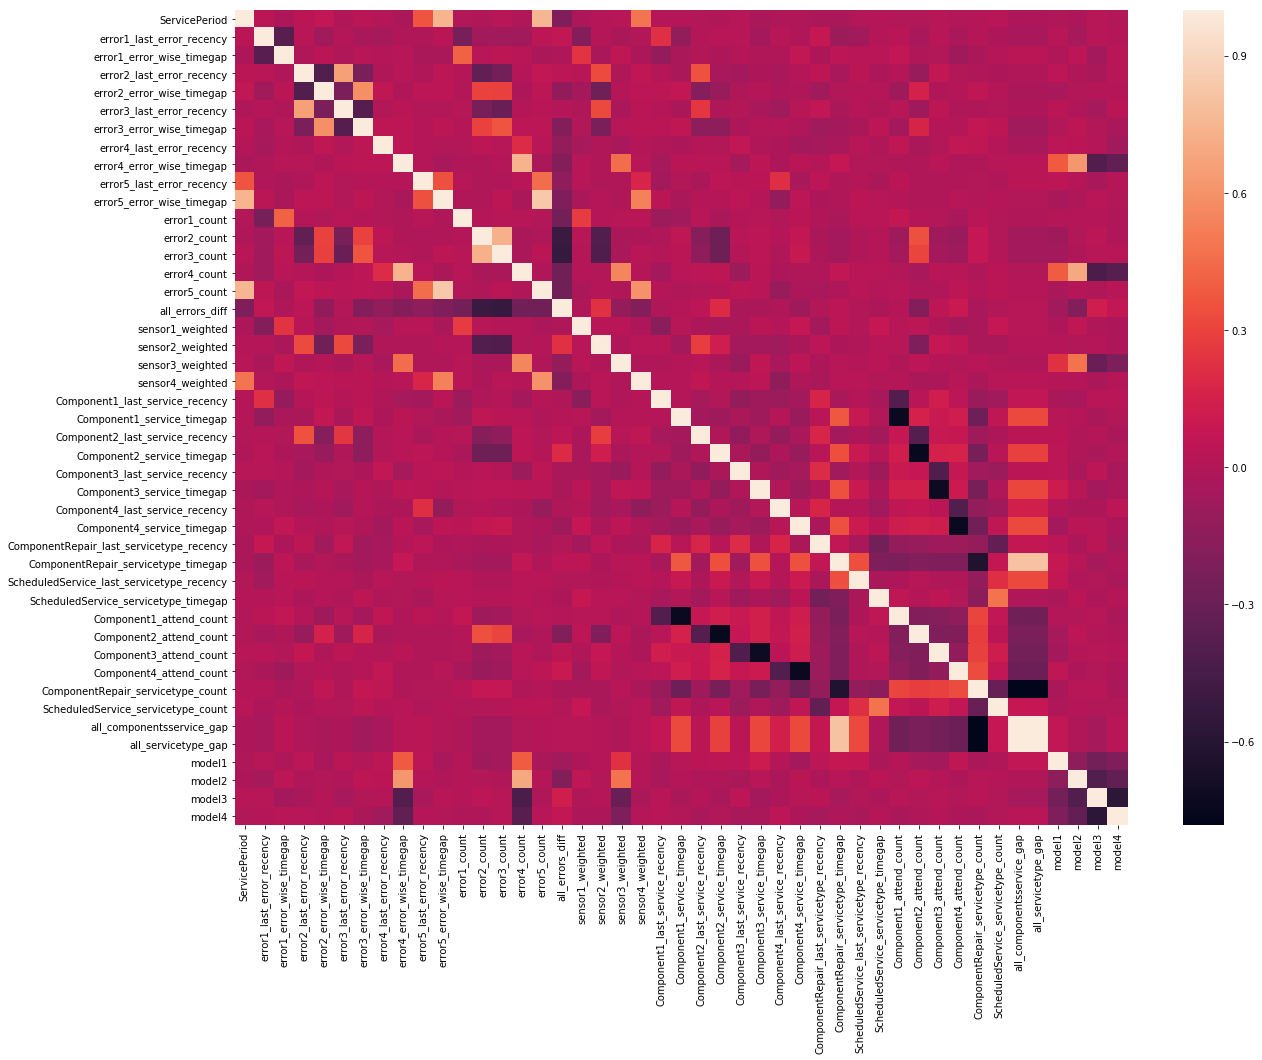

In [464]:
# correlation plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))
corr = data.corr()
sns_plot= sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig = sns_plot.get_figure()
fig.savefig("output.png")

In [420]:
y_test_preds = ada_clf.predict(test)
pred_test_ADA = pd.DataFrame(y_test_preds, columns=['ActionPoint'])
model_ADA = pd.concat([index_1.reset_index(drop=True),pred_test_ADA.reset_index(drop=True)], axis=1)
model_ADA.to_csv('model_ADA2.csv')

In [423]:
param_grid = { 'n_estimators': [10,20,50,100,200,300,400,500],'learning_rate':[0.1,0.2,0.3,0.5,0.7], 'algorithm':["SAMME"]}

ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=6)

ada_grid.fit(X_valid,y_valid)

ada_cv_best = ada_grid.best_estimator_
y_preds = ada_cv_best.predict(X_valid)


print(ada_grid.best_params_)
print(ada_grid.best_score_)

print(ada_cv_best.score(X_valid,y_valid))
print(classification_report(y_valid, y_preds))


{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}
0.6403940886699507
0.7093596059113301
                      precision    recall  f1-score   support

     ComponentRepair       0.70      0.92      0.79       124
ComponentReplacement       0.00      0.00      0.00        21
             NoIssue       0.77      0.52      0.62        58

         avg / total       0.65      0.71      0.66       203



# Gradient Boost

In [388]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=100, learning_rate=0.5,max_features='log2', random_state=42)
gbrt.fit(X_train, y_train)

train_predictions = gbrt.predict(X_train)
print(classification_report(y_train,train_predictions))


predictions = gbrt.predict(X_valid)
print(classification_report(y_valid,predictions))

                      precision    recall  f1-score   support

     ComponentRepair       0.88      0.98      0.93       289
ComponentReplacement       1.00      0.78      0.87        49
             NoIssue       0.93      0.80      0.86       133

         avg / total       0.91      0.90      0.90       471

                      precision    recall  f1-score   support

     ComponentRepair       0.68      0.77      0.72       124
ComponentReplacement       0.00      0.00      0.00        21
             NoIssue       0.57      0.53      0.55        58

         avg / total       0.58      0.63      0.60       203



# XG Boost Algorithm 

In [538]:
!pip install xgboost

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [550]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='softmax', colsample_bytree = 0.4, learning_rate = 0.3,
                max_depth = 1, alpha = 10, n_estimators = 100, scale_pos_weight= 0.6, eval_metric = 'mlogloss')
xg_reg.fit(X_train,y_train)

pred_train_1 = xg_reg.predict(X_train)
pred_valid_1 = xg_reg.predict(X_valid) 
pred_test_1 = xg_reg.predict(test) 


print(classification_report(y_train, pred_train_1))
print(classification_report(y_valid, pred_valid_1))


                      precision    recall  f1-score   support

     ComponentRepair       0.80      0.96      0.88       289
ComponentReplacement       1.00      0.53      0.69        49
             NoIssue       0.87      0.65      0.74       133

         avg / total       0.84      0.83      0.82       471

                      precision    recall  f1-score   support

     ComponentRepair       0.69      0.85      0.76       124
ComponentReplacement       0.50      0.14      0.22        21
             NoIssue       0.60      0.45      0.51        58

         avg / total       0.64      0.67      0.64       203



C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pvinay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [551]:

pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


train_xg = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
valid_xg= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_xg = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


train_xg.to_csv('train_xg.csv')
valid_xg.to_csv('valid_xg.csv')
test_xg.to_csv('test_xg.csv')

# Stacking Model combining ADA, Knaive Bayes, Logistic Regression, Random forest, Support Vector Classifier, XG Boost using decision tree and logistic regression

In [12]:
train_stack = pd.read_csv('train.csv')

In [13]:
train_stack.head(5)

MachineID              ADA               KB              Log  \
0  MID11457          NoIssue          NoIssue          NoIssue   
1  MID11477          NoIssue  ComponentRepair          NoIssue   
2  MID11179          NoIssue  ComponentRepair  ComponentRepair   
3  MID11834  ComponentRepair  ComponentRepair  ComponentRepair   
4  MID11147  ComponentRepair  ComponentRepair  ComponentRepair   

     Random Forest              SVC              XGB      ActionPoint  
0          NoIssue          NoIssue  ComponentRepair          NoIssue  
1          NoIssue          NoIssue  ComponentRepair  ComponentRepair  
2          NoIssue  ComponentRepair  ComponentRepair          NoIssue  
3  ComponentRepair  ComponentRepair  ComponentRepair  ComponentRepair  
4  ComponentRepair  ComponentRepair  ComponentRepair  ComponentRepair

In [14]:
test_stack = pd.read_csv('test.csv')

In [15]:
test_stack.shape

(326, 7)

In [16]:
train_stack_dummified = pd.get_dummies(train_stack, columns =['ADA', 'KB', 'Log','Random Forest', 'SVC', 'XGB'])

In [17]:
test_stack_dummified = pd.get_dummies(test_stack, columns =['ADA', 'KB', 'Log','Random Forest', 'SVC', 'XGB'])

# Decision tree

In [18]:
train_stack_dummified.set_index('MachineID', inplace=True)
test_stack_dummified.set_index('MachineID', inplace=True)

X= train_stack_dummified.drop(['ActionPoint'], axis=1, inplace=False)
y= train_stack_dummified.ActionPoint

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,random_state=225,stratify = y)

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(criterion='entropy',max_features= 'log2', class_weight='balanced', max_depth=6)
dt.fit(X_train, y_train)

# clf_1 = LogisticRegression(class_weight= 'balanced', solver = 'saga', penalty = 'l2', C = 0.001)
# clf_1.fit(X_train,y_train)


pred_train_1 = dt.predict(X_train)
pred_valid_1 = dt.predict(X_valid) 
pred_test_1 = dt.predict(test_stack_dummified) 

print(classification_report(y_train, pred_train_1))
print(classification_report(y_valid, pred_valid_1))

                      precision    recall  f1-score   support

     ComponentRepair       0.90      0.84      0.87       289
ComponentReplacement       0.79      0.84      0.81        49
             NoIssue       0.76      0.85      0.80       133

         avg / total       0.85      0.84      0.84       471

                      precision    recall  f1-score   support

     ComponentRepair       0.88      0.90      0.89       124
ComponentReplacement       0.77      0.81      0.79        21
             NoIssue       0.85      0.81      0.83        58

         avg / total       0.86      0.86      0.86       203



In [594]:
# pred_train_1 = pd.DataFrame(pred_train_1, columns=['ActionPoint'])
# pred_valid_1 = pd.DataFrame(pred_valid_1, columns=['ActionPoint'])
pred_test_1 = pd.DataFrame(pred_test_1, columns=['ActionPoint'])


#train_Stack_DT = pd.concat([index_train.reset_index(drop=True),pred_train_1.reset_index(drop=True)], axis=1)
#valid_Stack_DT= pd.concat([index_valid.reset_index(drop=True),pred_valid_1.reset_index(drop=True)], axis=1)
test_Stack_log = pd.concat([index_1.reset_index(drop=True),pred_test_1.reset_index(drop=True)], axis=1)


#train_Stack_DT.to_csv('train_Stack_DT.csv')
#valid_Stack_DT.to_csv('valid_Stack_DT.csv')
test_Stack_log.to_csv('test_Stack_log.csv')